# 

In [1]:
import tensorflow as tf
print(tf.__version__)


2.0.0-dev20190213


In [2]:
print(tf.__file__ )

C:\Windows\system32\env002\lib\site-packages\tensorflow\__init__.py


# work: model  9 10

In [3]:
#tf.enable_eager_execution()

In [4]:
tf.executing_eagerly()


True

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pydot_ng
%matplotlib inline

In [6]:
import mpld3
mpld3.enable_notebook()

In [7]:
data_dir = r'D:\python_code\data\stock\^NYA'
fname = os.path.join(data_dir, 'NYA 1981 2018 technical_custom_loss4.csv')
df = pd.read_csv(fname)
df['Date'] = pd.to_datetime(df["Date"])
df_idx = df.set_index(["Date"], drop=True)
df_idx.head(5)

Close  vex_sign  cave_sign   <Open>   <High>   <Low>   <Volume>  \
Date                                                                           
1981-01-02  827.50         0          0   827.50   827.50  827.50          0   
1981-01-05  836.17         0          1   836.17   836.17  836.17          0   
1981-01-06  836.81         0          1   836.81   836.81  836.81          0   
1981-01-07  817.24         1          0   817.24   817.24  817.24          0   
1981-01-08  805.72         1          0   805.72   805.72  805.72          0   

             <ParCl>   <FastAvg>   <SlowAvg>  ...   INDPRO       RPI  PERMIT  \
Date                                          ...                              
1981-01-02       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-05       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-06       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-07       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-08       0.0         0.0         0.0  ...  52.4688  5723.536    1221   

            PAYEMS    ICSA  AWHMAN  PPIACO  USSLIND  STLFSI  USREC  
Date                                                                
1981-01-02   91037  399000    40.1    95.2      0.0     0.0      0  
1981-01-05   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-06   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-07   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-08   91037  410000    40.1    95.2      0.0     0.0      0  

[5 rows x 48 columns]

In [8]:
#把順序調換
df_idx = df_idx.sort_index(axis=0, ascending=False)
df_idx = df_idx.iloc[::-1]

In [9]:
df_idx.head(5)

Close  vex_sign  cave_sign   <Open>   <High>   <Low>   <Volume>  \
Date                                                                           
1981-01-02  827.50         0          0   827.50   827.50  827.50          0   
1981-01-05  836.17         0          1   836.17   836.17  836.17          0   
1981-01-06  836.81         0          1   836.81   836.81  836.81          0   
1981-01-07  817.24         1          0   817.24   817.24  817.24          0   
1981-01-08  805.72         1          0   805.72   805.72  805.72          0   

             <ParCl>   <FastAvg>   <SlowAvg>  ...   INDPRO       RPI  PERMIT  \
Date                                          ...                              
1981-01-02       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-05       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-06       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-07       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-08       0.0         0.0         0.0  ...  52.4688  5723.536    1221   

            PAYEMS    ICSA  AWHMAN  PPIACO  USSLIND  STLFSI  USREC  
Date                                                                
1981-01-02   91037  399000    40.1    95.2      0.0     0.0      0  
1981-01-05   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-06   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-07   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-08   91037  410000    40.1    95.2      0.0     0.0      0  

[5 rows x 48 columns]

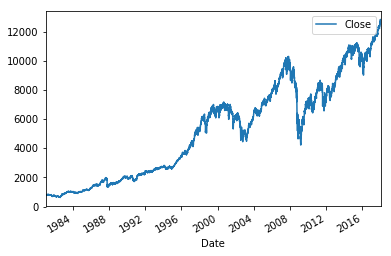

In [10]:
data = df_idx
data.plot(y='Close')

In [11]:
diff = data.index.values[-1] - data.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("total data days:",days)
print("Total data: %d years"%years)
print("80 percent data = 1981 to %d"%(1981 + int(0.8*years)))
print(diff)

total data days: 13510.0
Total data: 37 years
80 percent data = 1981 to 2010
1167264000000000000 nanoseconds


In [12]:
#切割訓練與測試資料
split_date = pd.Timestamp('01-01-2011')

train = data.loc[:split_date]
test = data.loc[split_date:]
test_date = test.index
test_date = pd.to_datetime(test_date)
train_date = train.index
train_date = pd.to_datetime(train_date)

In [13]:
# 資料正規化

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

C:\Windows\system32\env002\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
#without sc
#train_sc = train
#test_sc = test

In [15]:
train_sc.shape

(7570, 48)

In [16]:
train_sc_df = pd.DataFrame(train_sc,index=train.index,columns=train.columns)
test_sc_df = pd.DataFrame(test_sc,index=test.index,columns=test.columns)



In [17]:
train_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
1981-01-02  0.021235       0.0        0.0  0.021235  0.021070  0.021381   
1981-01-05  0.022129       0.0        1.0  0.022129  0.021958  0.022282   
1981-01-06  0.022195       0.0        1.0  0.022195  0.022024  0.022348   
1981-01-07  0.020176       1.0        0.0  0.020176  0.020020  0.020315   
1981-01-08  0.018987       1.0        0.0  0.018987  0.018840  0.019118   
1981-01-09  0.019249       0.0        1.0  0.019249  0.019100  0.019382   
1981-01-12  0.019336       0.0        1.0  0.019336  0.019186  0.019469   
1981-01-13  0.019150       1.0        0.0  0.019150  0.019002  0.019282   
1981-01-14  0.019369       0.0        1.0  0.019369  0.019219  0.019502   
1981-01-15  0.019849       0.0        1.0  0.019849  0.019695  0.019985   
1981-01-16  0.020220       0.0        1.0  0.020220  0.020064  0.020360   
1981-01-19  0.019968       1.0        0.0  0.019968  0.019814  0.020106   
1981-01-20  0.018343       1.0        0.0  0.018343  0.018201  0.018469   
1981-01-21  0.018102       1.0        0.0  0.018103  0.017962  0.018227   
1981-01-22  0.017415       1.0        0.0  0.017415  0.017280  0.017535   
1981-01-23  0.017372       1.0        0.0  0.017372  0.017237  0.017492   
1981-01-26  0.017077       1.0        0.0  0.017077  0.016944  0.017194   
1981-01-27  0.017885       0.0        1.0  0.017885  0.017746  0.018008   
1981-01-28  0.017437       1.0        0.0  0.017437  0.017302  0.017557   
1981-01-29  0.017339       1.0        0.0  0.017339  0.017205  0.017458   
1981-01-30  0.016881       1.0        0.0  0.016881  0.016750  0.016997   
1981-02-02  0.015134       1.0        0.0  0.015134  0.015017  0.015239   
1981-02-03  0.016019       0.0        1.0  0.016019  0.015895  0.016129   
1981-02-04  0.016193       0.0        1.0  0.016193  0.016068  0.016305   
1981-02-05  0.016924       0.0        1.0  0.016924  0.016793  0.017041   
1981-02-06  0.017491       0.0        1.0  0.017492  0.017356  0.017612   
1981-02-09  0.016640       1.0        0.0  0.016640  0.016511  0.016755   
1981-02-10  0.016564       1.0        0.0  0.016564  0.016436  0.016678   
1981-02-11  0.016007       1.0        0.0  0.016008  0.015884  0.016118   
1981-02-12  0.015549       1.0        0.0  0.015549  0.015429  0.015656   
...              ...       ...        ...       ...       ...       ...   
2010-11-18  0.722218       0.0        1.0  0.708696  0.718258  0.713579   
2010-11-19  0.724400       0.0        1.0  0.722221  0.718850  0.720675   
2010-11-22  0.721223       1.0        0.0  0.724402  0.718793  0.717531   
2010-11-23  0.706824       1.0        0.0  0.721227  0.715642  0.709336   
2010-11-24  0.718020       0.0        1.0  0.706830  0.712482  0.711700   
2010-11-26  0.709896       1.0        0.0  0.718024  0.712464  0.713557   
2010-11-29  0.708121       1.0        0.0  0.709900  0.704403  0.703271   
2010-11-30  0.702713       1.0        0.0  0.708122  0.702639  0.702845   
2010-12-01  0.720545       0.0        1.0  0.702719  0.715562  0.707560   
2010-12-02  0.731745       0.0        1.0  0.720550  0.726345  0.725514   
2010-12-03  0.735803       0.0        1.0  0.731753  0.730542  0.734697   
2010-12-06  0.734680       1.0        0.0  0.735808  0.730421  0.737063   
2010-12-07  0.734571       1.0        0.0  0.734692  0.737713  0.739344   
2010-12-08  0.735673       0.0        1.0  0.734576  0.732390  0.735815   
2010-12-09  0.738957       0.0        1.0  0.735679  0.734444  0.740117   
2010-12-10  0.743205       0.0        1.0  0.738962  0.737652  0.742864   
2010-12-13  0.745963       0.0        1.0  0.743212  0.743988  0.748332   
2010-12-14  0.746499       0.0        1.0  0.745968  0.744327  0.749392   
2010-12-15  0.740675       1.0        0.0  0.746504  0.741767  0.744724   
2010-12-16  0.744953       0.0        1.0  0.740624  0.739401  0.743900   
2010-12-17  0.744444       1.0        0.

In [18]:
test_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
2011-01-03  0.765978       0.0        1.0  0.757734  0.762863  0.762954   
2011-01-04  0.763730       1.0        0.0  0.765986  0.761960  0.763485   
2011-01-05  0.765573       0.0        1.0  0.763734  0.760090  0.763599   
2011-01-06  0.761533       1.0        0.0  0.765576  0.760625  0.765030   
2011-01-07  0.759410       1.0        0.0  0.761538  0.757786  0.758497   
2011-01-10  0.757941       1.0        0.0  0.759413  0.753533  0.757270   
2011-01-11  0.763368       0.0        1.0  0.757948  0.758773  0.763170   
2011-01-12  0.774132       0.0        1.0  0.763380  0.768532  0.768640   
2011-01-13  0.773766       1.0        0.0  0.774137  0.770802  0.777234   
2011-01-14  0.779410       0.0        1.0  0.773769  0.773379  0.776632   
2011-01-18  0.781143       0.0        1.0  0.779416  0.775486  0.783895   
2011-01-19  0.772268       1.0        0.0  0.781146  0.776054  0.775931   
2011-01-20  0.769358       1.0        0.0  0.772267  0.766287  0.768274   
2011-01-21  0.772354       0.0        1.0  0.769363  0.771086  0.774663   
2011-01-24  0.777686       0.0        1.0  0.772356  0.772245  0.776860   
2011-01-25  0.776005       1.0        0.0  0.777689  0.771667  0.775139   
2011-01-26  0.781424       0.0        1.0  0.776018  0.776472  0.781365   
2011-01-27  0.782809       0.0        1.0  0.781429  0.778334  0.785025   
2011-01-28  0.767905       1.0        0.0  0.782814  0.777079  0.772429   
2011-01-31  0.775802       0.0        1.0  0.767911  0.770803  0.773201   
2011-02-01  0.791378       0.0        1.0  0.775811  0.785856  0.781156   
2011-02-02  0.789570       1.0        0.0  0.791380  0.786347  0.793940   
2011-02-03  0.791271       0.0        1.0  0.789574  0.785829  0.788143   
2011-02-04  0.791214       1.0        0.0  0.791277  0.785149  0.791312   
2011-02-07  0.796182       0.0        1.0  0.791223  0.792077  0.796674   
2011-02-08  0.800641       0.0        1.0  0.796188  0.794529  0.800151   
2011-02-09  0.796941       1.0        0.0  0.800646  0.794446  0.798721   
2011-02-10  0.796233       1.0        0.0  0.796940  0.790890  0.794649   
2011-02-11  0.800129       0.0        1.0  0.796237  0.795120  0.797131   
2011-02-14  0.803252       0.0        1.0  0.800134  0.797521  0.804999   
...              ...       ...        ...       ...       ...       ...   
2017-11-16  1.205541       0.0        1.0  1.200956  1.198120  1.209230   
2017-11-17  1.205501       1.0        0.0  1.203278  1.197382  1.211156   
2017-11-20  1.207346       0.0        1.0  1.205898  1.199061  1.212990   
2017-11-21  1.214067       0.0        1.0  1.210636  1.205843  1.218976   
2017-11-22  1.214576       0.0        1.0  1.216164  1.207833  1.221857   
2017-11-24  1.217786       0.0        1.0  1.217976  1.209363  1.225921   
2017-11-27  1.214572       1.0        0.0  1.217730  1.208915  1.222897   
2017-11-28  1.227931       0.0        1.0  1.216784  1.218779  1.224904   
2017-11-29  1.232171       0.0        1.0  1.228900  1.224530  1.237367   
2017-11-30  1.239032       0.0        1.0  1.235794  1.234145  1.243122   
2017-12-01  1.237666       1.0        0.0  1.239961  1.231645  1.230538   
2017-12-04  1.239764       0.0        1.0  1.245023  1.239347  1.248104   
2017-12-05  1.232774       1.0        0.0  1.239857  1.230733  1.240478   
2017-12-06  1.229190       1.0        0.0  1.231028  1.223076  1.236835   
2017-12-07  1.232962       0.0        1.0  1.227674  1.224697  1.235546   
2017-12-08  1.240607       0.0        1.0  1.236687  1.231014  1.243400   
2017-12-11  1.243203       0.0        1.0  1.241651  1.233694  1.250002   
2017-12-12  1.246254       0.0        1.0  1.244499  1.238588  1.252469   
2017-12-13  1.246430       0.0        1.0  1.247426  1.240914  1.255024   
2017-12-14  1.239163       1.0        0.0  1.247191  1.238254  1.247708   
2017-12-15  1.246450       0.0        1.

In [19]:
for s in range(-5,-4):
    train_sc_df['Y_{}'.format(s)] = train_sc_df['Close'].shift(s)
    test_sc_df['Y_{}'.format(s)] = test_sc_df['Close'].shift(s)



In [20]:
train_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
1981-01-02  0.021235       0.0        0.0  0.021235  0.021070  0.021381   
1981-01-05  0.022129       0.0        1.0  0.022129  0.021958  0.022282   
1981-01-06  0.022195       0.0        1.0  0.022195  0.022024  0.022348   
1981-01-07  0.020176       1.0        0.0  0.020176  0.020020  0.020315   
1981-01-08  0.018987       1.0        0.0  0.018987  0.018840  0.019118   
1981-01-09  0.019249       0.0        1.0  0.019249  0.019100  0.019382   
1981-01-12  0.019336       0.0        1.0  0.019336  0.019186  0.019469   
1981-01-13  0.019150       1.0        0.0  0.019150  0.019002  0.019282   
1981-01-14  0.019369       0.0        1.0  0.019369  0.019219  0.019502   
1981-01-15  0.019849       0.0        1.0  0.019849  0.019695  0.019985   
1981-01-16  0.020220       0.0        1.0  0.020220  0.020064  0.020360   
1981-01-19  0.019968       1.0        0.0  0.019968  0.019814  0.020106   
1981-01-20  0.018343       1.0        0.0  0.018343  0.018201  0.018469   
1981-01-21  0.018102       1.0        0.0  0.018103  0.017962  0.018227   
1981-01-22  0.017415       1.0        0.0  0.017415  0.017280  0.017535   
1981-01-23  0.017372       1.0        0.0  0.017372  0.017237  0.017492   
1981-01-26  0.017077       1.0        0.0  0.017077  0.016944  0.017194   
1981-01-27  0.017885       0.0        1.0  0.017885  0.017746  0.018008   
1981-01-28  0.017437       1.0        0.0  0.017437  0.017302  0.017557   
1981-01-29  0.017339       1.0        0.0  0.017339  0.017205  0.017458   
1981-01-30  0.016881       1.0        0.0  0.016881  0.016750  0.016997   
1981-02-02  0.015134       1.0        0.0  0.015134  0.015017  0.015239   
1981-02-03  0.016019       0.0        1.0  0.016019  0.015895  0.016129   
1981-02-04  0.016193       0.0        1.0  0.016193  0.016068  0.016305   
1981-02-05  0.016924       0.0        1.0  0.016924  0.016793  0.017041   
1981-02-06  0.017491       0.0        1.0  0.017492  0.017356  0.017612   
1981-02-09  0.016640       1.0        0.0  0.016640  0.016511  0.016755   
1981-02-10  0.016564       1.0        0.0  0.016564  0.016436  0.016678   
1981-02-11  0.016007       1.0        0.0  0.016008  0.015884  0.016118   
1981-02-12  0.015549       1.0        0.0  0.015549  0.015429  0.015656   
...              ...       ...        ...       ...       ...       ...   
2010-11-18  0.722218       0.0        1.0  0.708696  0.718258  0.713579   
2010-11-19  0.724400       0.0        1.0  0.722221  0.718850  0.720675   
2010-11-22  0.721223       1.0        0.0  0.724402  0.718793  0.717531   
2010-11-23  0.706824       1.0        0.0  0.721227  0.715642  0.709336   
2010-11-24  0.718020       0.0        1.0  0.706830  0.712482  0.711700   
2010-11-26  0.709896       1.0        0.0  0.718024  0.712464  0.713557   
2010-11-29  0.708121       1.0        0.0  0.709900  0.704403  0.703271   
2010-11-30  0.702713       1.0        0.0  0.708122  0.702639  0.702845   
2010-12-01  0.720545       0.0        1.0  0.702719  0.715562  0.707560   
2010-12-02  0.731745       0.0        1.0  0.720550  0.726345  0.725514   
2010-12-03  0.735803       0.0        1.0  0.731753  0.730542  0.734697   
2010-12-06  0.734680       1.0        0.0  0.735808  0.730421  0.737063   
2010-12-07  0.734571       1.0        0.0  0.734692  0.737713  0.739344   
2010-12-08  0.735673       0.0        1.0  0.734576  0.732390  0.735815   
2010-12-09  0.738957       0.0        1.0  0.735679  0.734444  0.740117   
2010-12-10  0.743205       0.0        1.0  0.738962  0.737652  0.742864   
2010-12-13  0.745963       0.0        1.0  0.743212  0.743988  0.748332   
2010-12-14  0.746499       0.0        1.0  0.745968  0.744327  0.749392   
2010-12-15  0.740675       1.0        0.0  0.746504  0.741767  0.744724   
2010-12-16  0.744953       0.0        1.0  0.740624  0.739401  0.743900   
2010-12-17  0.744444       1.0        0.

In [21]:
test_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
2011-01-03  0.765978       0.0        1.0  0.757734  0.762863  0.762954   
2011-01-04  0.763730       1.0        0.0  0.765986  0.761960  0.763485   
2011-01-05  0.765573       0.0        1.0  0.763734  0.760090  0.763599   
2011-01-06  0.761533       1.0        0.0  0.765576  0.760625  0.765030   
2011-01-07  0.759410       1.0        0.0  0.761538  0.757786  0.758497   
2011-01-10  0.757941       1.0        0.0  0.759413  0.753533  0.757270   
2011-01-11  0.763368       0.0        1.0  0.757948  0.758773  0.763170   
2011-01-12  0.774132       0.0        1.0  0.763380  0.768532  0.768640   
2011-01-13  0.773766       1.0        0.0  0.774137  0.770802  0.777234   
2011-01-14  0.779410       0.0        1.0  0.773769  0.773379  0.776632   
2011-01-18  0.781143       0.0        1.0  0.779416  0.775486  0.783895   
2011-01-19  0.772268       1.0        0.0  0.781146  0.776054  0.775931   
2011-01-20  0.769358       1.0        0.0  0.772267  0.766287  0.768274   
2011-01-21  0.772354       0.0        1.0  0.769363  0.771086  0.774663   
2011-01-24  0.777686       0.0        1.0  0.772356  0.772245  0.776860   
2011-01-25  0.776005       1.0        0.0  0.777689  0.771667  0.775139   
2011-01-26  0.781424       0.0        1.0  0.776018  0.776472  0.781365   
2011-01-27  0.782809       0.0        1.0  0.781429  0.778334  0.785025   
2011-01-28  0.767905       1.0        0.0  0.782814  0.777079  0.772429   
2011-01-31  0.775802       0.0        1.0  0.767911  0.770803  0.773201   
2011-02-01  0.791378       0.0        1.0  0.775811  0.785856  0.781156   
2011-02-02  0.789570       1.0        0.0  0.791380  0.786347  0.793940   
2011-02-03  0.791271       0.0        1.0  0.789574  0.785829  0.788143   
2011-02-04  0.791214       1.0        0.0  0.791277  0.785149  0.791312   
2011-02-07  0.796182       0.0        1.0  0.791223  0.792077  0.796674   
2011-02-08  0.800641       0.0        1.0  0.796188  0.794529  0.800151   
2011-02-09  0.796941       1.0        0.0  0.800646  0.794446  0.798721   
2011-02-10  0.796233       1.0        0.0  0.796940  0.790890  0.794649   
2011-02-11  0.800129       0.0        1.0  0.796237  0.795120  0.797131   
2011-02-14  0.803252       0.0        1.0  0.800134  0.797521  0.804999   
...              ...       ...        ...       ...       ...       ...   
2017-11-16  1.205541       0.0        1.0  1.200956  1.198120  1.209230   
2017-11-17  1.205501       1.0        0.0  1.203278  1.197382  1.211156   
2017-11-20  1.207346       0.0        1.0  1.205898  1.199061  1.212990   
2017-11-21  1.214067       0.0        1.0  1.210636  1.205843  1.218976   
2017-11-22  1.214576       0.0        1.0  1.216164  1.207833  1.221857   
2017-11-24  1.217786       0.0        1.0  1.217976  1.209363  1.225921   
2017-11-27  1.214572       1.0        0.0  1.217730  1.208915  1.222897   
2017-11-28  1.227931       0.0        1.0  1.216784  1.218779  1.224904   
2017-11-29  1.232171       0.0        1.0  1.228900  1.224530  1.237367   
2017-11-30  1.239032       0.0        1.0  1.235794  1.234145  1.243122   
2017-12-01  1.237666       1.0        0.0  1.239961  1.231645  1.230538   
2017-12-04  1.239764       0.0        1.0  1.245023  1.239347  1.248104   
2017-12-05  1.232774       1.0        0.0  1.239857  1.230733  1.240478   
2017-12-06  1.229190       1.0        0.0  1.231028  1.223076  1.236835   
2017-12-07  1.232962       0.0        1.0  1.227674  1.224697  1.235546   
2017-12-08  1.240607       0.0        1.0  1.236687  1.231014  1.243400   
2017-12-11  1.243203       0.0        1.0  1.241651  1.233694  1.250002   
2017-12-12  1.246254       0.0        1.0  1.244499  1.238588  1.252469   
2017-12-13  1.246430       0.0        1.0  1.247426  1.240914  1.255024   
2017-12-14  1.239163       1.0        0.0  1.247191  1.238254  1.247708   
2017-12-15  1.246450       0.0        1.

In [22]:
#X_train = train_sc_df.dropna().drop('Y', axis=1)
X_train = train_sc_df.dropna().drop('Y_-5', axis=1)
y_train = train_sc_df.dropna()['Y_-5']
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()


C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [23]:
vex_sign_train[0:7]

array([0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [24]:
vex_sign_train.shape

(7565,)

In [25]:
X_train

array([[0.02123455, 0.        , 0.        , ..., 0.44481605, 0.1198527 ,
        0.        ],
       [0.0221293 , 0.        , 1.        , ..., 0.44481605, 0.1198527 ,
        0.        ],
       [0.02219534, 0.        , 1.        , ..., 0.44481605, 0.1198527 ,
        0.        ],
       ...,
       [0.75175002, 0.        , 1.        , ..., 0.68896321, 0.03615668,
        0.        ],
       [0.75439815, 0.        , 1.        , ..., 0.68896321, 0.03615668,
        0.        ],
       [0.75373767, 1.        , 0.        , ..., 0.68896321, 0.03615668,
        0.        ]])

In [26]:
X_train.shape

(7565, 48)

In [27]:
y_train.shape

(7565,)

In [28]:
X_test = test_sc_df.dropna().drop('Y_-5', axis=1)
y_test = test_sc_df.dropna().dropna()['Y_-5']
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()


C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [29]:
y_train

array([0.01924897, 0.01933566, 0.0191499 , ..., 0.75746527, 0.75647764,
       0.7577274 ])

In [30]:
X_test

array([[ 0.76597828,  0.        ,  1.        , ...,  0.67892977,
         0.02360228,  0.        ],
       [ 0.76372954,  1.        ,  0.        , ...,  0.67892977,
         0.02360228,  0.        ],
       [ 0.76557271,  0.        ,  1.        , ...,  0.67892977,
         0.02360228,  0.        ],
       ...,
       [ 1.25138934,  1.        ,  0.        , ...,  0.68060201,
        -0.1282223 ,  0.        ],
       [ 1.25139037,  0.        ,  1.        , ...,  0.68060201,
        -0.1282223 ,  0.        ],
       [ 1.25682491,  0.        ,  1.        , ...,  0.68060201,
        -0.1282223 ,  0.        ]])

In [31]:
y_test

array([0.75794103, 0.76336834, 0.77413216, ..., 1.25907262, 1.26228216,
       1.25771553])

In [32]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (7565 x 48)
Test size: (1756 x 48)


# setup

In [33]:
loss_imagepath ='images/loss/'
predict_imagepath ='images/predict/'
losspath = 'csv/loss/'
if (not (os.path.exists(losspath))):
        os.makedirs(losspath)
model_dirpath = 'h5/'
file_name='file_name'

#for func initiate
history_model='history_model'
input_tensor='input_tensor'
y_pred='y_pred'
Target_DirPath='Target_DirPath'
test_date_trim='test_date_trim'
train_date_trim='train_date_trim'


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Add,Reshape,Lambda
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow.keras.backend as K
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping,CSVLogger
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Input,layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import PReLU
from tensorflow.keras.utils import plot_model
K.clear_session()
#from tcn import compiled_tcn,TCN

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


val_split_ratio = 0.1
penalty=0.1

In [35]:
def plot_model_architecture(model, file_name):
    file_path = 'images/model/{}.png'.format(file_name)
    if not os.path.exists(os.path.dirname(file_path)):
        try:
            os.makedirs(os.path.dirname(file_path))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

    plot_model(model, to_file=file_path, show_shapes=True)

In [36]:
def loadmodel(model_dirpath=model_dirpath,file_name=file_name):
    model = load_model(model_dirpath + file_name + '.h5')
    return model
def loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name):
    import matplotlib.pyplot as plt
    print(history_model.history.keys())
    loss = history_model.history['loss']
    val_loss = history_model.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    if (not (os.path.exists(loss_imagepath))):
                os.makedirs(loss_imagepath)
    plt.savefig(loss_imagepath +  file_name +'_lr0001_dila16_loss.png')
def CSV(losspath=losspath, file_name=file_name):
    csv_logger = CSVLogger(losspath + file_name + '_lr0001_dila16_log.csv')
    return csv_logger
def predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign,cave_sign=cave_sign,
                  predict_imagepath=predict_imagepath, file_name=file_name):
    from sklearn.metrics import r2_score
    y_pred = model.predict([X_tst_t,vex_sign,cave_sign])
    #y_pred是三天前就知道，所以往前移三格
    y_test_pic = y_test[:]
    y_pred_pic = y_pred[5:]
    y_test_rsquare = y_test[:]
    plt.plot(y_test_pic, label='True')
    plt.plot(y_pred_pic, label='pred')
    plt.xlabel('Observation')
    plt.ylabel('Scaled_Value')
    plt.legend()
    print("y_pred.shape:",y_pred.shape)
    print("y_test_rsquare.shape:",y_test_rsquare.shape)
    r2_test = r2_score(y_test_rsquare, y_pred)
    print('R-Squared: %f'%(r2_test))
    print("The Adjusted R2 score on the Test set is:\t{:0.3f}"\
          .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
    if (not (os.path.exists(predict_imagepath))):
            os.makedirs(predict_imagepath)
    plt.savefig(predict_imagepath +  file_name +'_lr0001_dila16_loss.png')
    plt.show()    
    return y_pred
def save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,\
             file_name=file_name,test_date=test_date):
    # 把價格縮放解除
    ## create empty table with label fields
    y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
    ## put the predicted values in the right field
    y_pred_data_like[:,0] = y_pred[:,0]
    ## inverse transform and then select the right field
    y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

    #檢查測試資料的維度
    yd_size = X_test.shape[0]

    # 把價格轉換維度
    yd = y_pred_data.reshape(yd_size,)

    #把最後X天刪除(預測X天後)
    test_date_trim = np.delete(test_date, np.s_[-5:])

    # 製作CSV
    AnalysisResult = pd.DataFrame()
    Date = pd.Series(test_date_trim)
    Close = pd.Series(yd)
    Date.name = 'Date'
    Close.name = 'Close'

    # 因為放在MC要開高低收，所以複製收盤填入
    Open = Close.copy()
    High = Close.copy()
    Low = Close.copy()
    Open.name = 'Open'
    High.name = 'High'
    Low.name = 'Low'

    AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

    # 輸出CSV檔案
    import os
    Target_DirPath = 'Deep-Learning-in-Python-master/'
    if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
    AnalysisResult.to_csv(Target_DirPath + file_name+'_lr0001_dila16.csv', mode='w', header=True, index=False)
    
def save_train_csv(file_name=file_name):
    y_train_pred = model.predict([X_tr_t])
    # 把價格縮放解除
    ## create empty table with label fields
    y_train_pred_data_like = np.zeros(shape=(len(y_train_pred), X_train.shape[1]))
    ## put the predicted values in the right field
    y_train_pred_data_like[:,0] = y_train_pred[:,0]
    ## inverse transform and then select the right field
    y_train_pred_data = sc.inverse_transform(y_train_pred_data_like)[:,0]

    #檢查測試資料的維度
    yd_size = X_train.shape[0]

    # 把價格轉換維度
    yd = y_train_pred_data.reshape(yd_size,)

    #把最後X天刪除(預測X天後)
    train_date_trim = np.delete(train_date, np.s_[-5:])

    # 製作CSV
    AnalysisResult = pd.DataFrame()
    Date = pd.Series(train_date_trim)
    Close = pd.Series(yd)
    Date.name = 'Date'
    Close.name = 'Close'

    # 因為放在MC要開高低收，所以複製收盤填入
    Open = Close.copy()
    High = Close.copy()
    Low = Close.copy()
    Open.name = 'Open'
    High.name = 'High'
    Low.name = 'Low'

    AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

    # 輸出CSV檔案
    import os
    Target_DirPath = 'Deep-Learning-in-Python-master-train/'
    if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
    AnalysisResult.to_csv(Target_DirPath + file_name+'_lr0001_dila16_train.csv', mode='w', header=True, index=False)    

# tcn

In [37]:
act_of_skip_connections='selu'

In [38]:
import tensorflow.keras.backend as K
import tensorflow.keras.layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Activation, Lambda
from tensorflow.keras.layers import Conv1D, SpatialDropout1D
from tensorflow.keras.layers import Convolution1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import Input

from typing import List, Tuple


def channel_normalization(x):
    # type: (Layer) -> Layer
    """ Normalize a layer to the maximum activation

    This keeps a layers values between zero and one.
    It helps with relu's unbounded activation

    Args:
        x: The layer to normalize

    Returns:
        A maximal normalized layer
    """
    max_values = K.max(K.abs(x), 2, keepdims=True) + 1e-5
    out = x / max_values
    return out


def wave_net_activation(x):
    # type: (Layer) -> Layer
    """This method defines the activation used for WaveNet

    described in https://deepmind.com/blog/wavenet-generative-model-raw-audio/

    Args:
        x: The layer we want to apply the activation to

    Returns:
        A new layer with the wavenet activation applied
    """
    tanh_out = Activation('tanh')(x)
    sigm_out = Activation('sigmoid')(x)
    return tensorflow.keras.layers.multiply([tanh_out, sigm_out])


def residual_block(x, s, i, activation, nb_filters, kernel_size, padding, dropout_rate=0, name=''):
    # type: (Layer, int, int, str, int, int, str, float, str) -> Tuple[Layer, Layer]
    """Defines the residual block for the WaveNet TCN

    Args:
        x: The previous layer in the model
        s: The stack index i.e. which stack in the overall TCN
        i: The dilation power of 2 we are using for this residual block
        activation: The name of the type of activation to use
        nb_filters: The number of convolutional filters to use in this block
        kernel_size: The size of the convolutional kernel
        padding: The padding used in the convolutional layers, 'same' or 'causal'.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A tuple where the first element is the residual model layer, and the second
        is the skip connection.
    """

    original_x = x
    conv = Conv1D(filters=nb_filters, kernel_size=kernel_size,
                  dilation_rate=i, padding=padding,
                  name=name + '_d_%s_conv_%d_tanh_s%d' % (padding, i, s))(x)
    if activation == 'norm_relu':
        x = Activation('relu')(conv)
        x = Lambda(channel_normalization)(x)
    elif activation == 'wavenet':
        x = wave_net_activation(conv)
    else:
        x = Activation(activation)(conv)

    x = SpatialDropout1D(dropout_rate, name=name + '_spatial_dropout1d_%d_s%d_%f' % (i, s, dropout_rate))(x)

    # 1x1 conv.
    x = Convolution1D(nb_filters, 1, padding='same')(x)
    res_x = tensorflow.keras.layers.add([original_x, x])
    return res_x, x


def process_dilations(dilations):
    def is_power_of_two(num):
        return num != 0 and ((num & (num - 1)) == 0)

    if all([is_power_of_two(i) for i in dilations]):
        return dilations

    else:
        new_dilations = [2 ** i for i in dilations]
        # print(f'Updated dilations from {dilations} to {new_dilations} because of backwards compatibility.')
        return new_dilations


class TCN:
    """Creates a TCN layer.

        Input shape:
            A tensor of shape (batch_size, timesteps, input_dim).

        Args:
            nb_filters: The number of filters to use in the convolutional layers.
            kernel_size: The size of the kernel to use in each convolutional layer.
            dilations: The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
            nb_stacks : The number of stacks of residual blocks to use.
            activation: The activations to use (norm_relu, wavenet, relu...).
            padding: The padding to use in the convolutional layers, 'causal' or 'same'.
            use_skip_connections: Boolean. If we want to add skip connections from input to each residual block.
            return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
            dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
            name: Name of the model. Useful when having multiple TCN.

        Returns:
            A TCN layer.
        """

    def __init__(self,
                 nb_filters=64,
                 kernel_size=2,
                 nb_stacks=1,
                 dilations=[1, 2, 4, 8, 16],
                 activation='norm_relu',
                 padding='causal',
                 use_skip_connections=True,
                 dropout_rate=0.0,
                 return_sequences=True,
                 name='tcn'):
        self.name = name
        self.return_sequences = return_sequences
        self.dropout_rate = dropout_rate
        self.use_skip_connections = use_skip_connections
        self.activation = activation
        self.dilations = dilations
        self.nb_stacks = nb_stacks
        self.kernel_size = kernel_size
        self.nb_filters = nb_filters
        self.padding = padding

        if padding != 'causal' and padding != 'same':
            raise ValueError("Only 'causal' or 'same' padding are compatible for this layer.")

        if not isinstance(nb_filters, int):
            print('An interface change occurred after the version 2.1.2.')
            print('Before: tcn.TCN(i, return_sequences=False, ...)')
            print('Now should be: tcn.TCN(return_sequences=False, ...)(i)')
            print('Second solution is to pip install keras-tcn==2.1.2 to downgrade.')
            raise Exception()

    def __call__(self, inputs, Activation_of_skip_connections='selu'):
        x = inputs
        x = Convolution1D(self.nb_filters, 1, padding=self.padding, name=self.name + '_initial_conv')(x)
        skip_connections = []
        for s in range(self.nb_stacks):
            for i in self.dilations:
                x, skip_out = residual_block(x, s, i, self.activation, self.nb_filters,
                                             self.kernel_size, self.padding, self.dropout_rate, name=self.name)
                skip_connections.append(skip_out)
        if self.use_skip_connections:
            x = tensorflow.keras.layers.add(skip_connections)
        x = Activation(Activation_of_skip_connections)(x)

        if not self.return_sequences:
            output_slice_index = -1
            x = Lambda(lambda tt: tt[:, output_slice_index, :])(x)
        return x


def compiled_tcn(num_feat,  # type: int
                 num_classes,  # type: int
                 nb_filters,  # type: int
                 kernel_size,  # type: int
                 dilations,  # type: List[int]
                 nb_stacks,  # type: int
                 max_len,  # type: int
                 activation='norm_relu',  # type: str
                 padding='causal',  # type: str
                 use_skip_connections=True,  # type: bool
                 return_sequences=True,
                 regression=False,  # type: bool
                 dropout_rate=0.05,  # type: float
                 name='tcn'  # type: str
                 ):
    # type: (...) -> tensorflow.keras.Model
    """Creates a compiled TCN model for a given task (i.e. regression or classification).

    Args:
        num_feat: The number of features of your input, i.e. the last dimension of: (batch_size, timesteps, input_dim).
        num_classes: The size of the final dense layer, how many classes we are predicting.
        nb_filters: The number of filters to use in the convolutional layers.
        kernel_size: The size of the kernel to use in each convolutional layer.
        dilations: The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
        nb_stacks : The number of stacks of residual blocks to use.
        max_len: The maximum sequence length, use None if the sequence length is dynamic.
        activation: The activations to use.
        padding: The padding to use in the convolutional layers.
        use_skip_connections: Boolean. If we want to add skip connections from input to each residual block.
        return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
        regression: Whether the output should be continuous or discrete.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A compiled keras TCN.
    """

    dilations = process_dilations(dilations)

    input_layer = Input(shape=(max_len, num_feat))

    x = TCN(nb_filters, kernel_size, nb_stacks, dilations, activation,
            padding, use_skip_connections, dropout_rate, return_sequences, name)(input_layer)

    print('x.shape=', x.shape)

    if not regression:
        # classification
        x = Dense(num_classes)(x)
        x = Activation('softmax')(x)
        output_layer = x
        print(f'model.x = {input_layer.shape}')
        print(f'model.y = {output_layer.shape}')
        model = Model(input_layer, output_layer)

        # https://github.com/keras-team/keras/pull/11373
        # It's now in Keras@master but still not available with pip.
        # TODO To remove later.
        def accuracy(y_true, y_pred):
            # reshape in case it's in shape (num_samples, 1) instead of (num_samples,)
            if K.ndim(y_true) == K.ndim(y_pred):
                y_true = K.squeeze(y_true, -1)
            # convert dense predictions to labels
            y_pred_labels = K.argmax(y_pred, axis=-1)
            y_pred_labels = K.cast(y_pred_labels, K.floatx())
            return K.cast(K.equal(y_true, y_pred_labels), K.floatx())

        adam = optimizers.Adam(lr=0.002, clipnorm=1.)
        model.compile(adam, loss='sparse_categorical_crossentropy', metrics=[accuracy])
        print('Adam with norm clipping.')
    else:
        # regression
        x = Dense(1)(x)
        x = Activation('linear')(x)
        output_layer = x
        print(f'model.x = {input_layer.shape}')
        print(f'model.y = {output_layer.shape}')
        model = Model(input_layer, output_layer)
        adam = optimizers.Adam(lr=0.002, clipnorm=1.)
        model.compile(adam, loss=tf_stock_loss_7(vex_sign=vex_sign,cave_sign=cave_sign))

    return model

# loss func

In [39]:
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

In [40]:
def tf_stock_loss_5(vex_sign,cave_sign):
    def loss(y_true, y_pred):
        y_pred_previous= tf.roll(y_pred, shift=-1, axis=0)
        rising = K.less(y_pred_previous,y_pred)
        falling = K.greater(y_pred_previous ,y_pred)
        convex= K.equal(vex_sign,tf.ones(shape = tf.shape(vex_sign)))
        concave= K.equal(cave_sign,tf.ones(shape = tf.shape(cave_sign)))
        losses = tf.keras.backend.cast(tf.logical_and(convex,rising),dtype='float32')*penalty* mean_squared_error(y_true, y_pred)+\
                 tf.keras.backend.cast(tf.logical_and(concave,falling),dtype='float32')*penalty*mean_squared_error(y_true, y_pred)+\
                 mean_squared_error(y_true, y_pred)
        #losses = K.all(K.stack([convex, rising], axis=0), axis=0)*penalty* mean_squared_error(y_true, y_pred)+mean_squared_error(y_true, y_pred)
        """K.all(K.stack([concave, falling], axis=0), axis=0)*penalty** mean_squared_error(y_true, y_pred)+"""
        return losses
    return loss

In [41]:
def tf_stock_loss_6(vex_sign,cave_sign):
    def loss(y_true, y_pred):
        y_pred_tobemodified0= tf.reshape(y_pred, [-1])
        y_pred_tobemodified1= tf.roll(y_pred_tobemodified0, shift=1, axis=0)
        y_pred_previous= tf.reshape(y_pred_tobemodified1,tf.shape(y_pred))
        
        rising = K.less(y_pred_previous,y_pred)
        falling = K.greater(y_pred_previous ,y_pred)
        y_pred_falling= K.equal(vex_sign,tf.ones(shape = tf.shape(vex_sign)))
        y_pred_rising= K.equal(cave_sign,tf.ones(shape = tf.shape(cave_sign)))
        losses = tf.keras.backend.cast(tf.logical_and(y_pred_falling,rising),dtype='float32')*penalty* mean_squared_error(y_true, y_pred)+\
                 tf.keras.backend.cast(tf.logical_and(y_pred_rising,falling),dtype='float32')*penalty*mean_squared_error(y_true, y_pred)+\
                 mean_squared_error(y_true, y_pred)       
        return losses
    return loss

In [42]:
def tf_stock_loss_7(vex_sign,cave_sign):
    def loss(y_true, y_pred):
        
        y_pred_tobemodified0= tf.reshape(y_pred, [-1])
        y_pred_tobemodified1= tf.roll(y_pred_tobemodified0, shift=1, axis=0)
        y_pred_previous= tf.reshape(y_pred_tobemodified1,tf.shape(y_pred))
        
        y_pred_rising = K.less(y_pred_previous,y_pred)
        y_pred_falling = K.greater(y_pred_previous ,y_pred)    

        y_true_tobemodified0= tf.reshape(y_true, [-1])
        y_true_tobemodified1= tf.roll(y_true_tobemodified0, shift=1, axis=0)
        y_true_previous= tf.reshape(y_true_tobemodified1,tf.shape(y_true))
                                                                  
        y_true_rising = K.less(y_true_previous,y_true)
        y_true_falling = K.greater(y_true_previous ,y_true)

        losses = tf.keras.backend.cast(tf.logical_and(y_true_falling,y_pred_rising),dtype='float32')*penalty* mean_squared_error(y_true, y_pred)+\
                 tf.keras.backend.cast(tf.logical_and(y_true_rising,y_pred_falling),dtype='float32')*penalty*mean_squared_error(y_true, y_pred)+\
                 mean_squared_error(y_true, y_pred)       
        return losses
    return loss

In [43]:
def tf_stock_loss_8(vex_sign,cave_sign):
    def loss(y_true, y_pred):
        #indices = tf.constant([[0]])
        #updates = tf.constant([False])
        indices = tf.constant([[[0,0]]])
        updates = tf.constant([[False]])
        
        y_pred_tobemodified0= tf.reshape(y_pred, [-1])
        y_pred_tobemodified1= tf.roll(y_pred_tobemodified0, shift=1, axis=0)
        y_pred_previous= tf.reshape(y_pred_tobemodified1,tf.shape(y_pred))
        
        y_pred_rising0 = K.less(y_pred_previous,y_pred)
        y_pred_falling0 = K.greater(y_pred_previous ,y_pred)    
        y_pred_rising = tf.tensor_scatter_update(y_pred_rising0, indices, updates)
        y_pred_falling = tf.tensor_scatter_update(y_pred_falling0, indices, updates)
        
        y_true_tobemodified0= tf.reshape(y_true, [-1])
        y_true_tobemodified1= tf.roll(y_true_tobemodified0, shift=1, axis=0)
        y_true_previous= tf.reshape(y_true_tobemodified1,tf.shape(y_true))
                                                                  
        y_true_rising0 = K.less(y_true_previous,y_true)
        y_true_falling0 = K.greater(y_true_previous ,y_true)
        y_true_rising = tf.tensor_scatter_update(y_true_rising0, indices, updates)
        y_true_falling = tf.tensor_scatter_update(y_true_falling0, indices, updates)
        
        losses = tf.keras.backend.cast(tf.logical_and(y_true_falling,y_pred_rising),dtype='float32')*penalty* mean_squared_error(y_true, y_pred)+\
                 tf.keras.backend.cast(tf.logical_and(y_true_rising,y_pred_falling),dtype='float32')*penalty*mean_squared_error(y_true, y_pred)+\
                 mean_squared_error(y_true, y_pred)       
        return losses
    return loss


In [44]:
def custom_r2_score(file_name):
    Target_DirPath = 'Deep-Learning-in-Python-master/'
    file_end_with = '_lr0001_dila16.csv'
    #above need to be adjust
    df_for_eval= pd.read_csv(Target_DirPath + file_name + file_end_with)
    df_for_eval['Date'] = pd.to_datetime(df_for_eval["Date"])
    df_for_eval = df_for_eval.set_index(["Date"], drop=True)

    y_pred_for_eval = df_for_eval["Close"]
    print(y_pred_for_eval.shape)
    ## create empty table with label fields
    y_pred_for_eval_data_like = np.zeros(shape=(len(y_pred_for_eval), X_train.shape[1]))
    ## put the predicted values in the right field
    y_pred_for_eval_data_like[:,0] = y_pred_for_eval[:]
    ## transform and then select the right field
    y_pred_for_eval_data = sc.transform(y_pred_for_eval_data_like)[:,0]

    r2_test = r2_score(y_test, y_pred_for_eval_data)
    print("The Adjusted R2 score on the Test set is:\t{:0.3f}"\
              .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

    y_test_diff = np.diff(y_test) #y_test[i]與y_test[i-1]差異
    y_pred_for_eval_data_diff = np.diff(y_pred_for_eval_data)#y_pred[i]與y_pred[i-1]差異
    rsquare_product = y_test_diff*y_pred_for_eval_data_diff #兩者相乘
    def return_same_sign_bool(d):
        d = np.array(d)
        return np.where(d > 0, 1, 0)
    rsquare_product_bool = return_same_sign_bool(rsquare_product) #如果兩者相乘為正數回傳1，非正數回傳0
    print("The Custom  sign score on the Test set is:\t{:0.3f}"\
              .format((int(sum(rsquare_product_bool)) / len(rsquare_product_bool)))) 
               #計算y_test及y_pred變動同向機率
    print("The Custom  R2 score on the Test set is:\t{:0.3f}"\
              .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])/2 
                      + ((int(sum(rsquare_product_bool)) / len(rsquare_product_bool)))/2 ))


In [45]:
#tcn9
file_name='NYA_de5_clf5_pe0.00001_tcn9'
penalty=0.00001

In [46]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=512, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_8(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_1[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation (Activation)         (None, 1, 512)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
______________________________________________________________________________________________

Epoch 10/600
6808/6808==============================] - 5s 802us/sample - loss: 0.0091 - val_loss: 0.0073
Epoch 11/600
6808/6808==============================] - 5s 798us/sample - loss: 0.0057 - val_loss: 0.0161
Epoch 12/600
6808/6808==============================] - 5s 800us/sample - loss: 0.0067 - val_loss: 0.0065lo - ETA: 0s - l - ETA: 0s - loss: 0.
Epoch 13/600
6808/6808==============================] - 5s 797us/sample - loss: 0.0055 - val_loss: 0.0206
Epoch 14/600
6808/6808==============================] - 5s 795us/sample - loss: 0.0055 - val_loss: 0.0088
Epoch 15/600
6808/6808==============================] - 5s 797us/sample - loss: 0.0050 - val_loss: 0.0062
Epoch 16/600
6808/6808==============================] - 5s 799us/sample - loss: 0.0044 - val_loss: 0.0178
Epoch 17/600
6808/6808==============================] - 5s 801us/sample - loss: 0.0041 - val_loss: 0.0104
Epoch 18/600
6808/6808==============================] - 5s 795us/sample - loss: 0.0031 - val_loss: 0.0064
Epoch 19/

Epoch 158/600
6808/6808==============================] - 6s 821us/sample - loss: 1.5169e-04 - val_loss: 0.0068
Epoch 159/600
6808/6808==============================] - 6s 822us/sample - loss: 1.5715e-04 - val_loss: 0.0048
Epoch 160/600
6808/6808==============================] - 6s 889us/sample - loss: 1.5485e-04 - val_loss: 0.0048
Epoch 161/600
6808/6808==============================] - 6s 823us/sample - loss: 1.6294e-04 - val_loss: 0.0049
Epoch 162/600
6808/6808==============================] - 6s 824us/sample - loss: 1.6149e-04 - val_loss: 0.0050
Epoch 163/600
6808/6808==============================] - 6s 822us/sample - loss: 1.6446e-04 - val_loss: 0.0067
Epoch 164/600
6808/6808==============================] - 6s 810us/sample - loss: 1.5013e-04 - val_loss: 0.0052
Epoch 165/600
6808/6808==============================] - 6s 814us/sample - loss: 1.5777e-04 - val_loss: 0.0059
Epoch 166/600
6808/6808==============================] - 6s 823us/sample - loss: 1.5520e-04 - val_loss: 0.0046
E

Epoch 232/600
6808/6808==============================] - 6s 821us/sample - loss: 1.3134e-04 - val_loss: 0.0032
Epoch 233/600
6808/6808==============================] - 6s 824us/sample - loss: 1.2976e-04 - val_loss: 0.0024
Epoch 234/600
6808/6808==============================] - 6s 820us/sample - loss: 1.4039e-04 - val_loss: 0.0035
Epoch 235/600
6808/6808==============================] - 6s 826us/sample - loss: 1.2649e-04 - val_loss: 0.0036
Epoch 236/600
6808/6808==============================] - 6s 823us/sample - loss: 1.2962e-04 - val_loss: 0.0034
Epoch 237/600
6808/6808==============================] - 6s 826us/sample - loss: 1.3513e-04 - val_loss: 0.0037
Epoch 238/600
6808/6808==============================] - 6s 825us/sample - loss: 1.2875e-04 - val_loss: 0.0038
Epoch 239/600
6808/6808==============================] - 6s 825us/sample - loss: 1.2296e-04 - val_loss: 0.0038
Epoch 240/600
6808/6808==============================] - 6s 815us/sample - loss: 1.3225e-04 - val_loss: 0.0035
E

6808/6808==============================] - 6s 824us/sample - loss: 1.2159e-04 - val_loss: 0.0088
Epoch 379/600
6808/6808==============================] - 6s 820us/sample - loss: 1.2059e-04 - val_loss: 0.0089
Epoch 380/600
6808/6808==============================] - 6s 823us/sample - loss: 1.2143e-04 - val_loss: 0.0118
Epoch 381/600
6808/6808==============================] - 6s 822us/sample - loss: 1.2533e-04 - val_loss: 0.0092
Epoch 382/600
6808/6808==============================] - 6s 822us/sample - loss: 1.1841e-04 - val_loss: 0.0104
Epoch 383/600
6808/6808==============================] - 6s 824us/sample - loss: 1.2221e-04 - val_loss: 0.0106
Epoch 384/600
6808/6808==============================] - 6s 824us/sample - loss: 1.1774e-04 - val_loss: 0.0095
Epoch 385/600
6808/6808==============================] - 6s 825us/sample - loss: 1.1567e-04 - val_loss: 0.0082
Epoch 386/600
6808/6808==============================] - 6s 825us/sample - loss: 1.1710e-04 - val_loss: 0.0104
Epoch 387/600
6

Epoch 452/600
6808/6808==============================] - 6s 826us/sample - loss: 1.1925e-04 - val_loss: 0.0112
Epoch 453/600
6808/6808==============================] - 6s 823us/sample - loss: 1.1290e-04 - val_loss: 0.0073
Epoch 454/600
6808/6808==============================] - 6s 827us/sample - loss: 1.1331e-04 - val_loss: 0.0072
Epoch 455/600
6808/6808==============================] - 6s 826us/sample - loss: 1.1368e-04 - val_loss: 0.0083
Epoch 456/600
6808/6808==============================] - 6s 821us/sample - loss: 1.0766e-04 - val_loss: 0.0072
Epoch 457/600
6808/6808==============================] - 6s 821us/sample - loss: 1.1606e-04 - val_loss: 0.0078
Epoch 458/600
6808/6808==============================] - 6s 822us/sample - loss: 1.1355e-04 - val_loss: 0.0082
Epoch 459/600
6808/6808==============================] - 6s 824us/sample - loss: 1.1244e-04 - val_loss: 0.0066
Epoch 460/600
6808/6808==============================] - 6s 821us/sample - loss: 1.1499e-04 - val_loss: 0.0059
E

Epoch 526/600
6808/6808==============================] - 6s 815us/sample - loss: 1.0820e-04 - val_loss: 0.0062
Epoch 527/600
6808/6808==============================] - 6s 822us/sample - loss: 1.0502e-04 - val_loss: 0.0056
Epoch 528/600
6808/6808==============================] - 6s 824us/sample - loss: 1.0739e-04 - val_loss: 0.0087
Epoch 529/600
6808/6808==============================] - 6s 822us/sample - loss: 1.0463e-04 - val_loss: 0.0070
Epoch 530/600
6808/6808==============================] - 6s 819us/sample - loss: 1.0598e-04 - val_loss: 0.0059
Epoch 531/600
6808/6808==============================] - 6s 824us/sample - loss: 1.0204e-04 - val_loss: 0.0061
Epoch 532/600
6808/6808==============================] - 6s 827us/sample - loss: 1.0400e-04 - val_loss: 0.0068
Epoch 533/600
6808/6808==============================] - 6s 826us/sample - loss: 1.0528e-04 - val_loss: 0.0064
Epoch 534/600
6808/6808==============================] - 6s 822us/sample - loss: 1.0270e-04 - val_loss: 0.0078
E

Epoch 600/600
6808/6808==============================] - 6s 827us/sample - loss: 1.0213e-04 - val_loss: 0.0071


y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.914466
The Adjusted R2 score on the Test set is:	0.912


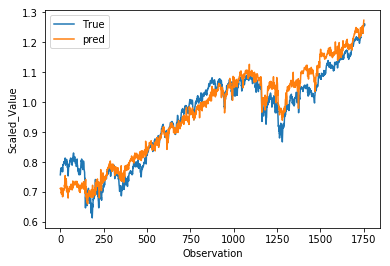

dict_keys(['loss', 'val_loss'])


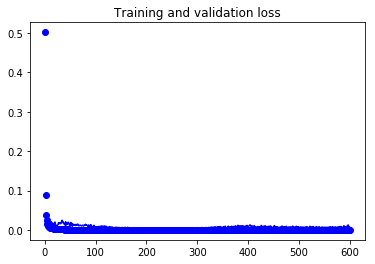

In [47]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)
save_train_csv(file_name=file_name)

# custom r2 score

In [48]:
for iter_number in range(9,10):
    iter_number = str(iter_number)
    file_name='NYA_de5_clf5_pe0.00001_tcn'+iter_number
    print(file_name+":")
    custom_r2_score(file_name)

NYA_de5_clf5_pe0.00001_tcn9:
(1756,)
The Adjusted R2 score on the Test set is:	0.912
The Custom  sign score on the Test set is:	0.497
The Custom  R2 score on the Test set is:	0.705


# tcn9~11 change filter size pe0.0001

In [49]:
#tcn9
file_name='NYA_de5_clf5_pe0.0001_tcn9'
penalty=0.0001

In [50]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=512, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_8(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_4[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_6 (Activation)       (None, 1, 512)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 10/600
6808/6808==============================] - 6s 881us/sample - loss: 0.0063 - val_loss: 0.0231
Epoch 11/600
6808/6808==============================] - 6s 873us/sample - loss: 0.0056 - val_loss: 0.0316
Epoch 12/600
6808/6808==============================] - 6s 872us/sample - loss: 0.0072 - val_loss: 0.0619
Epoch 13/600
6808/6808==============================] - 6s 873us/sample - loss: 0.0055 - val_loss: 0.0803
Epoch 14/600
6808/6808==============================] - 6s 865us/sample - loss: 0.0053 - val_loss: 0.0519
Epoch 15/600
6808/6808==============================] - 6s 874us/sample - loss: 0.0047 - val_loss: 0.0661
Epoch 16/600
6808/6808==============================] - 6s 874us/sample - loss: 0.0051 - val_loss: 0.0314
Epoch 17/600
6808/6808==============================] - 6s 870us/sample - loss: 0.0032 - val_loss: 0.0127
Epoch 18/600
6808/6808==============================] - 6s 870us/sample - loss: 0.0028 - val_loss: 0.0342
Epoch 19/600
6808/6808========================

6808/6808==============================] - 6s 867us/sample - loss: 1.5131e-04 - val_loss: 0.0060
Epoch 160/600
6808/6808==============================] - 6s 863us/sample - loss: 1.5290e-04 - val_loss: 0.0056
Epoch 161/600
6808/6808==============================] - 6s 868us/sample - loss: 1.5493e-04 - val_loss: 0.0045
Epoch 162/600
6808/6808==============================] - 6s 865us/sample - loss: 1.6916e-04 - val_loss: 0.0052
Epoch 163/600
6808/6808==============================] - 6s 866us/sample - loss: 1.4888e-04 - val_loss: 0.0056
Epoch 164/600
6808/6808==============================] - 6s 865us/sample - loss: 1.5021e-04 - val_loss: 0.0048
Epoch 165/600
6808/6808==============================] - 6s 867us/sample - loss: 1.5809e-04 - val_loss: 0.0058
Epoch 166/600
6808/6808==============================] - 6s 864us/sample - loss: 1.5048e-04 - val_loss: 0.0043
Epoch 167/600
6808/6808==============================] - 6s 863us/sample - loss: 1.5347e-04 - val_loss: 0.0048
Epoch 168/600
6

Epoch 233/600
6808/6808==============================] - 6s 876us/sample - loss: 1.2971e-04 - val_loss: 0.0023
Epoch 234/600
6808/6808==============================] - 6s 872us/sample - loss: 1.3657e-04 - val_loss: 0.0031
Epoch 235/600
6808/6808==============================] - 6s 871us/sample - loss: 1.3267e-04 - val_loss: 0.0034
Epoch 236/600
6808/6808==============================] - 6s 874us/sample - loss: 1.2990e-04 - val_loss: 0.0029
Epoch 237/600
6808/6808==============================] - 6s 874us/sample - loss: 1.3274e-04 - val_loss: 0.0023
Epoch 238/600
6808/6808==============================] - 6s 871us/sample - loss: 1.2981e-04 - val_loss: 0.0032
Epoch 239/600
6808/6808==============================] - 6s 870us/sample - loss: 1.3528e-04 - val_loss: 0.0029
Epoch 240/600
6808/6808==============================] - 6s 874us/sample - loss: 1.3390e-04 - val_loss: 0.0024
Epoch 241/600
6808/6808==============================] - 6s 876us/sample - loss: 1.3263e-04 - val_loss: 0.0034
E

Epoch 307/600
6808/6808==============================] - 6s 874us/sample - loss: 1.2135e-04 - val_loss: 0.0034
Epoch 308/600
6808/6808==============================] - 6s 873us/sample - loss: 1.1926e-04 - val_loss: 0.0030
Epoch 309/600
6808/6808==============================] - 6s 870us/sample - loss: 1.2623e-04 - val_loss: 0.0027
Epoch 310/600
6808/6808==============================] - 6s 871us/sample - loss: 1.2848e-04 - val_loss: 0.0030
Epoch 311/600
6808/6808==============================] - 6s 874us/sample - loss: 1.1326e-04 - val_loss: 0.0036
Epoch 312/600
6808/6808==============================] - 6s 872us/sample - loss: 1.1813e-04 - val_loss: 0.0030
Epoch 313/600
6808/6808==============================] - 6s 874us/sample - loss: 1.1847e-04 - val_loss: 0.0037
Epoch 314/600
6808/6808==============================] - 6s 939us/sample - loss: 1.2430e-04 - val_loss: 0.0030
Epoch 315/600
6808/6808==============================] - 6s 870us/sample - loss: 1.2408e-04 - val_loss: 0.0027
E

Epoch 381/600
6808/6808==============================] - 6s 870us/sample - loss: 1.1937e-04 - val_loss: 0.0057
Epoch 382/600
6808/6808==============================] - 6s 881us/sample - loss: 1.2148e-04 - val_loss: 0.0055
Epoch 383/600
6808/6808==============================] - 6s 870us/sample - loss: 1.2573e-04 - val_loss: 0.0064
Epoch 384/600
6808/6808==============================] - 6s 877us/sample - loss: 1.2382e-04 - val_loss: 0.0055
Epoch 385/600
6808/6808==============================] - 6s 871us/sample - loss: 1.2058e-04 - val_loss: 0.0056
Epoch 386/600
6808/6808==============================] - 6s 872us/sample - loss: 1.2031e-04 - val_loss: 0.0060
Epoch 387/600
6808/6808==============================] - 6s 879us/sample - loss: 1.1848e-04 - val_loss: 0.0056
Epoch 388/600
6808/6808==============================] - 6s 871us/sample - loss: 1.2385e-04 - val_loss: 0.0074
Epoch 389/600
6808/6808==============================] - 6s 869us/sample - loss: 1.2351e-04 - val_loss: 0.0068
E

Epoch 455/600
6808/6808==============================] - 6s 871us/sample - loss: 1.1067e-04 - val_loss: 0.0047
Epoch 456/600
6808/6808==============================] - 6s 872us/sample - loss: 1.1895e-04 - val_loss: 0.0048
Epoch 457/600
6808/6808==============================] - 6s 875us/sample - loss: 1.1245e-04 - val_loss: 0.0071
Epoch 458/600
6808/6808==============================] - 6s 873us/sample - loss: 1.1407e-04 - val_loss: 0.0065
Epoch 459/600
6808/6808==============================] - 6s 871us/sample - loss: 1.1721e-04 - val_loss: 0.0051
Epoch 460/600
6808/6808==============================] - 6s 876us/sample - loss: 1.1626e-04 - val_loss: 0.0050
Epoch 461/600
6808/6808==============================] - 6s 876us/sample - loss: 1.1499e-04 - val_loss: 0.0050
Epoch 462/600
6808/6808==============================] - 6s 873us/sample - loss: 1.0980e-04 - val_loss: 0.0048
Epoch 463/600
6808/6808==============================] - 6s 872us/sample - loss: 1.1410e-04 - val_loss: 0.0045
E

Epoch 529/600
6808/6808==============================] - 6s 860us/sample - loss: 1.1055e-04 - val_loss: 0.0057
Epoch 530/600
6808/6808==============================] - 6s 847us/sample - loss: 1.0421e-04 - val_loss: 0.0061
Epoch 531/600
6808/6808==============================] - 6s 861us/sample - loss: 1.1201e-04 - val_loss: 0.0071
Epoch 532/600
6808/6808==============================] - 6s 863us/sample - loss: 1.1268e-04 - val_loss: 0.0042
Epoch 533/600
6808/6808==============================] - 6s 864us/sample - loss: 1.1369e-04 - val_loss: 0.0051
Epoch 534/600
6808/6808==============================] - 6s 866us/sample - loss: 1.0827e-04 - val_loss: 0.0051
Epoch 535/600
6808/6808==============================] - 6s 862us/sample - loss: 1.1168e-04 - val_loss: 0.0059
Epoch 536/600
6808/6808==============================] - 6s 859us/sample - loss: 1.1391e-04 - val_loss: 0.0042
Epoch 537/600
6808/6808==============================] - 6s 866us/sample - loss: 1.0970e-04 - val_loss: 0.0044
E

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.913524
The Adjusted R2 score on the Test set is:	0.911


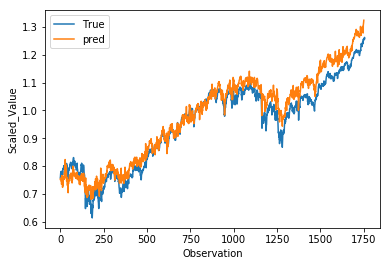

dict_keys(['loss', 'val_loss'])


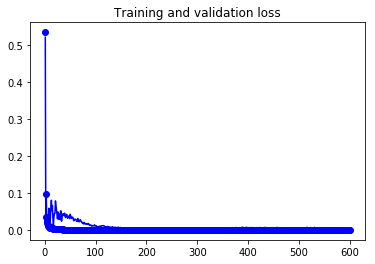

In [51]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)
save_train_csv(file_name=file_name)

# custom r2 score

In [52]:
for iter_number in range(9,10):
    iter_number = str(iter_number)
    file_name='NYA_de5_clf5_pe0.0001_tcn'+iter_number
    print(file_name+":")
    custom_r2_score(file_name)

NYA_de5_clf5_pe0.0001_tcn9:
(1756,)
The Adjusted R2 score on the Test set is:	0.911
The Custom  sign score on the Test set is:	0.499
The Custom  R2 score on the Test set is:	0.705


# tcn9~11 change filter size pe0.001

In [53]:
#tcn9
file_name='NYA_de5_clf5_pe0.001_tcn9'
penalty=0.001

In [54]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=512, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_8(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_7[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_12 (Activation)      (None, 1, 512)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 10/600
6808/6808==============================] - 5s 793us/sample - loss: 0.0064 - val_loss: 0.0698
Epoch 11/600
6808/6808==============================] - 6s 808us/sample - loss: 0.0082 - val_loss: 0.0148
Epoch 12/600
6808/6808==============================] - 5s 801us/sample - loss: 0.0060 - val_loss: 0.0455
Epoch 13/600
6808/6808==============================] - 5s 800us/sample - loss: 0.0066 - val_loss: 0.0182
Epoch 14/600
6808/6808==============================] - 5s 799us/sample - loss: 0.0041 - val_loss: 0.0192
Epoch 15/600
6808/6808==============================] - 5s 801us/sample - loss: 0.0047 - val_loss: 0.0455
Epoch 16/600
6808/6808==============================] - 5s 797us/sample - loss: 0.0047 - val_loss: 0.0469
Epoch 17/600
6808/6808==============================] - 5s 800us/sample - loss: 0.0051 - val_loss: 0.0307
Epoch 18/600
6808/6808==============================] - 5s 801us/sample - loss: 0.0029 - val_loss: 0.0211
Epoch 19/600
6808/6808========================

6808/6808==============================] - 5s 801us/sample - loss: 2.8757e-04 - val_loss: 0.0127
Epoch 86/600
6808/6808==============================] - 5s 800us/sample - loss: 2.7951e-04 - val_loss: 0.0093
Epoch 87/600
6808/6808==============================] - 5s 801us/sample - loss: 2.7812e-04 - val_loss: 0.0110
Epoch 88/600
6808/6808==============================] - 5s 802us/sample - loss: 3.0830e-04 - val_loss: 0.0076
Epoch 89/600
6808/6808==============================] - 5s 802us/sample - loss: 2.4269e-04 - val_loss: 0.0082
Epoch 90/600
6808/6808==============================] - 5s 798us/sample - loss: 2.6151e-04 - val_loss: 0.0081
Epoch 91/600
6808/6808==============================] - 5s 806us/sample - loss: 2.5158e-04 - val_loss: 0.0087
Epoch 92/600
6808/6808==============================] - 6s 811us/sample - loss: 2.6385e-04 - val_loss: 0.0113
Epoch 93/600
6808/6808==============================] - 5s 791us/sample - loss: 2.6911e-04 - val_loss: 0.0076
Epoch 94/600
6808/6808=

Epoch 159/600
6808/6808==============================] - 5s 803us/sample - loss: 1.7664e-04 - val_loss: 0.0068
Epoch 160/600
6808/6808==============================] - 5s 797us/sample - loss: 1.6598e-04 - val_loss: 0.0060
Epoch 161/600
6808/6808==============================] - 5s 802us/sample - loss: 1.7000e-04 - val_loss: 0.0059
Epoch 162/600
6808/6808==============================] - 5s 804us/sample - loss: 1.6709e-04 - val_loss: 0.0059
Epoch 163/600
6808/6808==============================] - 5s 804us/sample - loss: 1.6547e-04 - val_loss: 0.0052
Epoch 164/600
6808/6808==============================] - 5s 806us/sample - loss: 1.5761e-04 - val_loss: 0.0052loss: 1.4
Epoch 165/600
6808/6808==============================] - 5s 804us/sample - loss: 1.5401e-04 - val_loss: 0.0046
Epoch 166/600
6808/6808==============================] - 5s 801us/sample - loss: 1.5427e-04 - val_loss: 0.0056
Epoch 167/600
6808/6808==============================] - 5s 805us/sample - loss: 1.5524e-04 - val_loss:

Epoch 305/600
6808/6808==============================] - 5s 803us/sample - loss: 1.2184e-04 - val_loss: 0.0034
Epoch 306/600
6808/6808==============================] - 5s 801us/sample - loss: 1.2409e-04 - val_loss: 0.0037
Epoch 307/600
6808/6808==============================] - 5s 807us/sample - loss: 1.2170e-04 - val_loss: 0.0036
Epoch 308/600
6808/6808==============================] - 5s 806us/sample - loss: 1.2003e-04 - val_loss: 0.0034
Epoch 309/600
6808/6808==============================] - 5s 798us/sample - loss: 1.1421e-04 - val_loss: 0.0039
Epoch 310/600
6808/6808==============================] - 5s 804us/sample - loss: 1.2023e-04 - val_loss: 0.0044
Epoch 311/600
6808/6808==============================] - 5s 806us/sample - loss: 1.1876e-04 - val_loss: 0.0045
Epoch 312/600
6808/6808==============================] - 5s 795us/sample - loss: 1.1417e-04 - val_loss: 0.0039
Epoch 313/600
6808/6808==============================] - 5s 804us/sample - loss: 1.1664e-04 - val_loss: 0.0038
E

6808/6808==============================] - 5s 806us/sample - loss: 1.1276e-04 - val_loss: 0.0093
Epoch 450/600
6808/6808==============================] - 5s 802us/sample - loss: 1.1175e-04 - val_loss: 0.0114
Epoch 451/600
6808/6808==============================] - 5s 799us/sample - loss: 1.1587e-04 - val_loss: 0.0119
Epoch 452/600
6808/6808==============================] - 5s 804us/sample - loss: 1.1630e-04 - val_loss: 0.0079A: 0s - loss: 9.450 - ETA: 0s - loss
Epoch 453/600
6808/6808==============================] - 5s 801us/sample - loss: 1.1861e-04 - val_loss: 0.0070
Epoch 454/600
6808/6808==============================] - 5s 801us/sample - loss: 1.1762e-04 - val_loss: 0.0093
Epoch 455/600
6808/6808==============================] - 5s 801us/sample - loss: 1.1703e-04 - val_loss: 0.0069
Epoch 456/600
6808/6808==============================] - 5s 802us/sample - loss: 1.1843e-04 - val_loss: 0.0088
Epoch 457/600
6808/6808==============================] - 5s 798us/sample - loss: 1.1171e-0

Epoch 522/600
6808/6808==============================] - 5s 785us/sample - loss: 1.0771e-04 - val_loss: 0.0073
Epoch 523/600
6808/6808==============================] - 5s 804us/sample - loss: 1.1147e-04 - val_loss: 0.0071
Epoch 524/600
6808/6808==============================] - 5s 803us/sample - loss: 1.0946e-04 - val_loss: 0.0079
Epoch 525/600
6808/6808==============================] - 5s 803us/sample - loss: 1.1084e-04 - val_loss: 0.0083
Epoch 526/600
6808/6808==============================] - 5s 801us/sample - loss: 1.0646e-04 - val_loss: 0.0079.6888e-0 - ETA: - ETA: 0s - 
Epoch 527/600
6808/6808==============================] - 5s 805us/sample - loss: 1.1018e-04 - val_loss: 0.0057
Epoch 528/600
6808/6808==============================] - 5s 801us/sample - loss: 1.0833e-04 - val_loss: 0.0053
Epoch 529/600
6808/6808==============================] - 5s 795us/sample - loss: 1.0759e-04 - val_loss: 0.0067
Epoch 530/600
6808/6808==============================] - 5s 799us/sample - loss: 1.0

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.913506
The Adjusted R2 score on the Test set is:	0.911


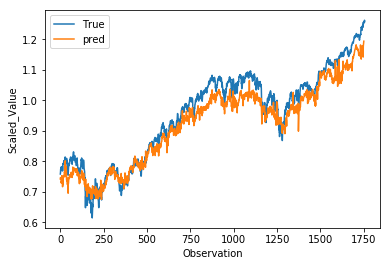

dict_keys(['loss', 'val_loss'])


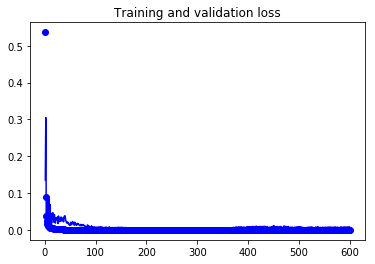

In [55]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)
save_train_csv(file_name=file_name)

# custom r2 score

In [56]:
for iter_number in range(9,10):
    iter_number = str(iter_number)
    file_name='NYA_de5_clf5_pe0.001_tcn'+iter_number
    print(file_name+":")
    custom_r2_score(file_name)

NYA_de5_clf5_pe0.001_tcn9:
(1756,)
The Adjusted R2 score on the Test set is:	0.911
The Custom  sign score on the Test set is:	0.501
The Custom  R2 score on the Test set is:	0.706


# tcn9~11 change filter size pe0.01

In [57]:
#tcn9
file_name='NYA_de5_clf5_pe0.01_tcn9'
penalty=0.01

In [58]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=512, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_8(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_10[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 1, 512)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 10/600
6808/6808==============================] - 6s 827us/sample - loss: 0.0065 - val_loss: 0.0436
Epoch 11/600
6808/6808==============================] - 6s 828us/sample - loss: 0.0087 - val_loss: 0.0272
Epoch 12/600
6808/6808==============================] - 6s 825us/sample - loss: 0.0081 - val_loss: 0.0669
Epoch 13/600
6808/6808==============================] - 6s 826us/sample - loss: 0.0068 - val_loss: 0.0688
Epoch 14/600
6808/6808==============================] - 6s 825us/sample - loss: 0.0054 - val_loss: 0.0557
Epoch 15/600
6808/6808==============================] - 6s 826us/sample - loss: 0.0036 - val_loss: 0.0521
Epoch 16/600
6808/6808==============================] - 6s 820us/sample - loss: 0.0036 - val_loss: 0.0707
Epoch 17/600
6808/6808==============================] - 6s 825us/sample - loss: 0.0040 - val_loss: 0.0885
Epoch 18/600
6808/6808==============================] - 6s 825us/sample - loss: 0.0051 - val_loss: 0.0578
Epoch 19/600
6808/6808========================

6808/6808==============================] - 6s 825us/sample - loss: 1.6631e-04 - val_loss: 0.0083
Epoch 160/600
6808/6808==============================] - 6s 826us/sample - loss: 1.6121e-04 - val_loss: 0.0047
Epoch 161/600
6808/6808==============================] - 6s 827us/sample - loss: 1.7463e-04 - val_loss: 0.0048
Epoch 162/600
6808/6808==============================] - 6s 823us/sample - loss: 1.6657e-04 - val_loss: 0.0063
Epoch 163/600
6808/6808==============================] - 6s 829us/sample - loss: 1.7288e-04 - val_loss: 0.0060
Epoch 164/600
6808/6808==============================] - 6s 831us/sample - loss: 1.7311e-04 - val_loss: 0.0061
Epoch 165/600
6808/6808==============================] - 6s 825us/sample - loss: 1.6698e-04 - val_loss: 0.0059
Epoch 166/600
6808/6808==============================] - 6s 828us/sample - loss: 1.7188e-04 - val_loss: 0.0068
Epoch 167/600
6808/6808==============================] - 6s 822us/sample - loss: 1.6970e-04 - val_loss: 0.0057
Epoch 168/600
6

Epoch 233/600
6808/6808==============================] - 6s 824us/sample - loss: 1.4506e-04 - val_loss: 0.0023
Epoch 234/600
6808/6808==============================] - 6s 828us/sample - loss: 1.4239e-04 - val_loss: 0.0028
Epoch 235/600
6808/6808==============================] - 6s 824us/sample - loss: 1.3472e-04 - val_loss: 0.0023
Epoch 236/600
6808/6808==============================] - 6s 828us/sample - loss: 1.4198e-04 - val_loss: 0.0022
Epoch 237/600
6808/6808==============================] - 6s 828us/sample - loss: 1.4327e-04 - val_loss: 0.0028
Epoch 238/600
6808/6808==============================] - 6s 821us/sample - loss: 1.4253e-04 - val_loss: 0.0025
Epoch 239/600
6808/6808==============================] - 6s 825us/sample - loss: 1.4128e-04 - val_loss: 0.0020
Epoch 240/600
6808/6808==============================] - 6s 822us/sample - loss: 1.3382e-04 - val_loss: 0.0025
Epoch 241/600
6808/6808==============================] - 6s 824us/sample - loss: 1.4287e-04 - val_loss: 0.0028
E

Epoch 307/600
6808/6808==============================] - 6s 832us/sample - loss: 1.2593e-04 - val_loss: 0.0015
Epoch 308/600
6808/6808==============================] - 6s 828us/sample - loss: 1.1909e-04 - val_loss: 0.0018
Epoch 309/600
6808/6808==============================] - 6s 823us/sample - loss: 1.1588e-04 - val_loss: 0.0019
Epoch 310/600
6808/6808==============================] - 6s 822us/sample - loss: 1.1631e-04 - val_loss: 0.0017
Epoch 311/600
6808/6808==============================] - 6s 828us/sample - loss: 1.2067e-04 - val_loss: 0.0017
Epoch 312/600
6808/6808==============================] - 6s 823us/sample - loss: 1.2264e-04 - val_loss: 0.0017
Epoch 313/600
6808/6808==============================] - 6s 830us/sample - loss: 1.3041e-04 - val_loss: 0.0017
Epoch 314/600
6808/6808==============================] - 6s 825us/sample - loss: 1.2450e-04 - val_loss: 0.0018
Epoch 315/600
6808/6808==============================] - 6s 827us/sample - loss: 1.2187e-04 - val_loss: 0.0016
E

Epoch 454/600
6808/6808==============================] - 6s 829us/sample - loss: 1.2011e-04 - val_loss: 0.0041
Epoch 455/600
6808/6808==============================] - 6s 828us/sample - loss: 1.1629e-04 - val_loss: 0.0034
Epoch 456/600
6808/6808==============================] - 6s 828us/sample - loss: 1.1308e-04 - val_loss: 0.0042
Epoch 457/600
6808/6808==============================] - 6s 829us/sample - loss: 1.1641e-04 - val_loss: 0.0042
Epoch 458/600
6808/6808==============================] - 6s 825us/sample - loss: 1.0883e-04 - val_loss: 0.0043
Epoch 459/600
6808/6808==============================] - 6s 822us/sample - loss: 1.1538e-04 - val_loss: 0.0038
Epoch 460/600
6808/6808==============================] - 6s 830us/sample - loss: 1.1279e-04 - val_loss: 0.0039
Epoch 461/600
6808/6808==============================] - 6s 829us/sample - loss: 1.1171e-04 - val_loss: 0.0043
Epoch 462/600
6808/6808==============================] - 6s 830us/sample - loss: 1.1740e-04 - val_loss: 0.0038
E

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.905371
The Adjusted R2 score on the Test set is:	0.903


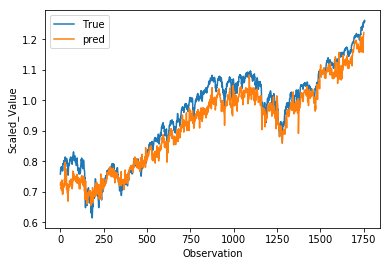

dict_keys(['loss', 'val_loss'])


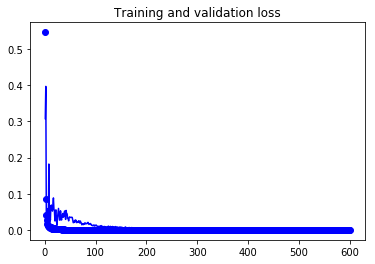

In [59]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)
save_train_csv(file_name=file_name)

# custom r2 score

In [60]:
for iter_number in range(9,10):
    iter_number = str(iter_number)
    file_name='NYA_de5_clf5_pe0.01_tcn'+iter_number
    print(file_name+":")
    custom_r2_score(file_name)

NYA_de5_clf5_pe0.01_tcn9:
(1756,)
The Adjusted R2 score on the Test set is:	0.903
The Custom  sign score on the Test set is:	0.497
The Custom  R2 score on the Test set is:	0.700


In [61]:
#tcn9
file_name='NYA_de5_clf5_pe0.1_tcn9'
penalty=0.1

In [62]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=512, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_8(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_13[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_24 (Activation)      (None, 1, 512)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 10/600
6808/6808==============================] - 6s 825us/sample - loss: 0.0076 - val_loss: 0.0911
Epoch 11/600
6808/6808==============================] - 6s 822us/sample - loss: 0.0065 - val_loss: 0.0226
Epoch 12/600
6808/6808==============================] - 6s 828us/sample - loss: 0.0060 - val_loss: 0.0302
Epoch 13/600
6808/6808==============================] - 6s 823us/sample - loss: 0.0053 - val_loss: 0.0318
Epoch 14/600
6808/6808==============================] - 6s 825us/sample - loss: 0.0050 - val_loss: 0.0345
Epoch 15/600
6808/6808==============================] - 6s 825us/sample - loss: 0.0050 - val_loss: 0.0342
Epoch 16/600
6808/6808==============================] - 6s 828us/sample - loss: 0.0054 - val_loss: 0.0324
Epoch 17/600
6808/6808==============================] - 6s 819us/sample - loss: 0.0038 - val_loss: 0.0482
Epoch 18/600
6808/6808==============================] - 6s 825us/sample - loss: 0.0047 - val_loss: 0.0943
Epoch 19/600
6808/6808========================

6808/6808==============================] - 6s 831us/sample - loss: 1.5441e-04 - val_loss: 0.0041
Epoch 160/600
6808/6808==============================] - 6s 832us/sample - loss: 1.5509e-04 - val_loss: 0.0033
Epoch 161/600
6808/6808==============================] - 6s 832us/sample - loss: 1.5065e-04 - val_loss: 0.0033
Epoch 162/600
6808/6808==============================] - 6s 830us/sample - loss: 1.6308e-04 - val_loss: 0.0042
Epoch 163/600
6808/6808==============================] - 6s 833us/sample - loss: 1.5527e-04 - val_loss: 0.0040
Epoch 164/600
6808/6808==============================] - 6s 837us/sample - loss: 1.5432e-04 - val_loss: 0.0038
Epoch 165/600
6808/6808==============================] - 6s 839us/sample - loss: 1.5420e-04 - val_loss: 0.0038
Epoch 166/600
6808/6808==============================] - 6s 831us/sample - loss: 1.6067e-04 - val_loss: 0.0033
Epoch 167/600
6808/6808==============================] - 6s 829us/sample - loss: 1.5542e-04 - val_loss: 0.0029
Epoch 168/600
6

Epoch 306/600
6808/6808==============================] - 6s 829us/sample - loss: 1.3324e-04 - val_loss: 0.0034
Epoch 307/600
6808/6808==============================] - 6s 829us/sample - loss: 1.2765e-04 - val_loss: 0.0046
Epoch 308/600
6808/6808==============================] - 6s 828us/sample - loss: 1.1957e-04 - val_loss: 0.0044
Epoch 309/600
6808/6808==============================] - 6s 830us/sample - loss: 1.2112e-04 - val_loss: 0.0045
Epoch 310/600
6808/6808==============================] - 6s 832us/sample - loss: 1.1788e-04 - val_loss: 0.0050
Epoch 311/600
6808/6808==============================] - 6s 826us/sample - loss: 1.3512e-04 - val_loss: 0.0046
Epoch 312/600
6808/6808==============================] - 6s 832us/sample - loss: 1.2624e-04 - val_loss: 0.0042
Epoch 313/600
6808/6808==============================] - 6s 833us/sample - loss: 1.3146e-04 - val_loss: 0.0039
Epoch 314/600
6808/6808==============================] - 6s 832us/sample - loss: 1.1985e-04 - val_loss: 0.0041
E

Epoch 380/600
6808/6808==============================] - 6s 831us/sample - loss: 1.2931e-04 - val_loss: 0.0101
Epoch 381/600
6808/6808==============================] - 6s 830us/sample - loss: 1.2837e-04 - val_loss: 0.0114
Epoch 382/600
6808/6808==============================] - 6s 833us/sample - loss: 1.3118e-04 - val_loss: 0.0089
Epoch 383/600
6808/6808==============================] - 6s 835us/sample - loss: 1.2420e-04 - val_loss: 0.0088
Epoch 384/600
6808/6808==============================] - 6s 833us/sample - loss: 1.2819e-04 - val_loss: 0.0086
Epoch 385/600
6808/6808==============================] - 6s 832us/sample - loss: 1.2510e-04 - val_loss: 0.0080
Epoch 386/600
6808/6808==============================] - 6s 832us/sample - loss: 1.2590e-04 - val_loss: 0.0069
Epoch 387/600
6808/6808==============================] - 6s 828us/sample - loss: 1.3694e-04 - val_loss: 0.0069
Epoch 388/600
6808/6808==============================] - 6s 834us/sample - loss: 1.3015e-04 - val_loss: 0.0062
E

Epoch 454/600
6808/6808==============================] - 6s 828us/sample - loss: 1.1906e-04 - val_loss: 0.0052
Epoch 455/600
6808/6808==============================] - 6s 834us/sample - loss: 1.2125e-04 - val_loss: 0.0040
Epoch 456/600
6808/6808==============================] - 6s 830us/sample - loss: 1.1989e-04 - val_loss: 0.0046
Epoch 457/600
6808/6808==============================] - 6s 826us/sample - loss: 1.1874e-04 - val_loss: 0.0045
Epoch 458/600
6808/6808==============================] - 6s 834us/sample - loss: 1.0794e-04 - val_loss: 0.0053
Epoch 459/600
6808/6808==============================] - 6s 827us/sample - loss: 1.1989e-04 - val_loss: 0.0051
Epoch 460/600
6808/6808==============================] - 6s 836us/sample - loss: 1.1392e-04 - val_loss: 0.0053
Epoch 461/600
6808/6808==============================] - 6s 830us/sample - loss: 1.1515e-04 - val_loss: 0.0047
Epoch 462/600
6808/6808==============================] - 6s 834us/sample - loss: 1.1867e-04 - val_loss: 0.0049
E

Epoch 528/600
6808/6808==============================] - 6s 827us/sample - loss: 1.0783e-04 - val_loss: 0.0070
Epoch 529/600
6808/6808==============================] - 6s 832us/sample - loss: 1.1058e-04 - val_loss: 0.0072
Epoch 530/600
6808/6808==============================] - 6s 836us/sample - loss: 1.0982e-04 - val_loss: 0.0049
Epoch 531/600
6808/6808==============================] - 6s 832us/sample - loss: 1.0906e-04 - val_loss: 0.0053
Epoch 532/600
6808/6808==============================] - 6s 829us/sample - loss: 1.1188e-04 - val_loss: 0.0064
Epoch 533/600
6808/6808==============================] - 6s 832us/sample - loss: 1.0743e-04 - val_loss: 0.0065
Epoch 534/600
6808/6808==============================] - 6s 832us/sample - loss: 1.0765e-04 - val_loss: 0.0062
Epoch 535/600
6808/6808==============================] - 6s 831us/sample - loss: 1.1229e-04 - val_loss: 0.0089
Epoch 536/600
6808/6808==============================] - 6s 830us/sample - loss: 1.1089e-04 - val_loss: 0.0062
E

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.717376
The Adjusted R2 score on the Test set is:	0.709


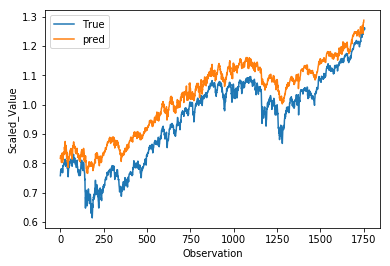

dict_keys(['loss', 'val_loss'])


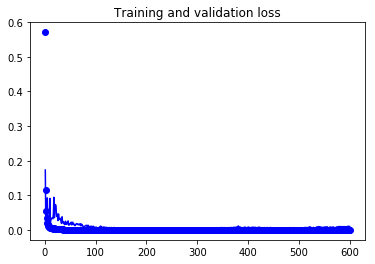

In [63]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)
save_train_csv(file_name=file_name)

# custom r2 score

In [64]:
for iter_number in range(9,10):
    iter_number = str(iter_number)
    file_name='NYA_de5_clf5_pe0.1_tcn'+iter_number
    print(file_name+":")
    custom_r2_score(file_name)

NYA_de5_clf5_pe0.1_tcn9:
(1756,)
The Adjusted R2 score on the Test set is:	0.709
The Custom  sign score on the Test set is:	0.504
The Custom  R2 score on the Test set is:	0.607


In [65]:
#tcn9
file_name='NYA_de5_clf5_pe1_tcn9'
penalty=1

In [66]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=512, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_8(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_16[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_30 (Activation)      (None, 1, 512)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 10/600
6808/6808==============================] - 6s 841us/sample - loss: 0.0122 - val_loss: 0.0294
Epoch 11/600
6808/6808==============================] - 6s 833us/sample - loss: 0.0103 - val_loss: 0.0379
Epoch 12/600
6808/6808==============================] - 6s 835us/sample - loss: 0.0084 - val_loss: 0.0210
Epoch 13/600
6808/6808==============================] - 6s 842us/sample - loss: 0.0062 - val_loss: 0.0554
Epoch 14/600
6808/6808==============================] - 6s 840us/sample - loss: 0.0066 - val_loss: 0.0399
Epoch 15/600
6808/6808==============================] - 6s 832us/sample - loss: 0.0075 - val_loss: 0.0462
Epoch 16/600
6808/6808==============================] - 6s 834us/sample - loss: 0.0069 - val_loss: 0.0309
Epoch 17/600
6808/6808==============================] - 6s 833us/sample - loss: 0.0051 - val_loss: 0.0411
Epoch 18/600
6808/6808==============================] - 6s 833us/sample - loss: 0.0055 - val_loss: 0.0444
Epoch 19/600
6808/6808========================

6808/6808==============================] - 6s 832us/sample - loss: 3.9711e-04 - val_loss: 0.0138
Epoch 87/600
6808/6808==============================] - 6s 838us/sample - loss: 3.9802e-04 - val_loss: 0.0164
Epoch 88/600
6808/6808==============================] - 6s 836us/sample - loss: 4.0647e-04 - val_loss: 0.0136
Epoch 89/600
6808/6808==============================] - 6s 835us/sample - loss: 4.2375e-04 - val_loss: 0.0134
Epoch 90/600
6808/6808==============================] - 6s 834us/sample - loss: 4.0462e-04 - val_loss: 0.0116
Epoch 91/600
6808/6808==============================] - 6s 840us/sample - loss: 3.7902e-04 - val_loss: 0.0132
Epoch 92/600
6808/6808==============================] - 6s 840us/sample - loss: 3.6984e-04 - val_loss: 0.0109
Epoch 93/600
6808/6808==============================] - 6s 837us/sample - loss: 3.8343e-04 - val_loss: 0.0173
Epoch 94/600
6808/6808==============================] - 6s 835us/sample - loss: 3.7666e-04 - val_loss: 0.0135
Epoch 95/600
6808/6808=

6808/6808==============================] - 6s 839us/sample - loss: 2.2611e-04 - val_loss: 0.0073
Epoch 161/600
6808/6808==============================] - 6s 837us/sample - loss: 2.2600e-04 - val_loss: 0.0069
Epoch 162/600
6808/6808==============================] - 6s 835us/sample - loss: 2.3830e-04 - val_loss: 0.0069
Epoch 163/600
6808/6808==============================] - 6s 839us/sample - loss: 2.2040e-04 - val_loss: 0.0057
Epoch 164/600
6808/6808==============================] - 6s 834us/sample - loss: 2.5012e-04 - val_loss: 0.0071
Epoch 165/600
6808/6808==============================] - 6s 837us/sample - loss: 2.2900e-04 - val_loss: 0.0054
Epoch 166/600
6808/6808==============================] - 6s 836us/sample - loss: 2.3728e-04 - val_loss: 0.0052
Epoch 167/600
6808/6808==============================] - 6s 836us/sample - loss: 2.1618e-04 - val_loss: 0.0078
Epoch 168/600
6808/6808==============================] - 6s 838us/sample - loss: 2.2045e-04 - val_loss: 0.0060
Epoch 169/600
6

Epoch 234/600
6808/6808==============================] - 6s 834us/sample - loss: 1.9464e-04 - val_loss: 0.0037
Epoch 235/600
6808/6808==============================] - 6s 837us/sample - loss: 1.9363e-04 - val_loss: 0.0041
Epoch 236/600
6808/6808==============================] - 6s 834us/sample - loss: 1.9266e-04 - val_loss: 0.0038
Epoch 237/600
6808/6808==============================] - 6s 834us/sample - loss: 1.9099e-04 - val_loss: 0.0032
Epoch 238/600
6808/6808==============================] - 6s 835us/sample - loss: 2.0282e-04 - val_loss: 0.0038
Epoch 239/600
6808/6808==============================] - 6s 840us/sample - loss: 1.9548e-04 - val_loss: 0.0037
Epoch 240/600
6808/6808==============================] - 6s 831us/sample - loss: 1.8974e-04 - val_loss: 0.0037
Epoch 241/600
6808/6808==============================] - 6s 836us/sample - loss: 1.8971e-04 - val_loss: 0.0038
Epoch 242/600
6808/6808==============================] - 6s 837us/sample - loss: 1.9303e-04 - val_loss: 0.0030
E

Epoch 308/600
6808/6808==============================] - 6s 840us/sample - loss: 1.6966e-04 - val_loss: 0.0039
Epoch 309/600
6808/6808==============================] - 6s 833us/sample - loss: 1.6197e-04 - val_loss: 0.0033
Epoch 310/600
6808/6808==============================] - 6s 834us/sample - loss: 1.6477e-04 - val_loss: 0.0027
Epoch 311/600
6808/6808==============================] - 6s 838us/sample - loss: 1.7048e-04 - val_loss: 0.0029
Epoch 312/600
6808/6808==============================] - 6s 835us/sample - loss: 1.7643e-04 - val_loss: 0.0036
Epoch 313/600
6808/6808==============================] - 6s 832us/sample - loss: 1.6300e-04 - val_loss: 0.0039
Epoch 314/600
6808/6808==============================] - 6s 832us/sample - loss: 1.7087e-04 - val_loss: 0.0029
Epoch 315/600
6808/6808==============================] - 6s 836us/sample - loss: 1.7519e-04 - val_loss: 0.0043
Epoch 316/600
6808/6808==============================] - 6s 835us/sample - loss: 1.6658e-04 - val_loss: 0.0037
E

Epoch 382/600
6808/6808==============================] - 6s 835us/sample - loss: 1.6670e-04 - val_loss: 0.0053
Epoch 383/600
6808/6808==============================] - 6s 834us/sample - loss: 1.6834e-04 - val_loss: 0.0058
Epoch 384/600
6808/6808==============================] - 6s 835us/sample - loss: 1.7707e-04 - val_loss: 0.0075
Epoch 385/600
6808/6808==============================] - 6s 836us/sample - loss: 1.8028e-04 - val_loss: 0.0078
Epoch 386/600
6808/6808==============================] - 6s 836us/sample - loss: 1.6458e-04 - val_loss: 0.0054
Epoch 387/600
6808/6808==============================] - 6s 835us/sample - loss: 1.8055e-04 - val_loss: 0.0075
Epoch 388/600
6808/6808==============================] - 6s 839us/sample - loss: 1.7679e-04 - val_loss: 0.0062
Epoch 389/600
6808/6808==============================] - 6s 834us/sample - loss: 1.7993e-04 - val_loss: 0.0077
Epoch 390/600
6808/6808==============================] - 6s 834us/sample - loss: 1.6749e-04 - val_loss: 0.0048
E

Epoch 529/600
6808/6808==============================] - 6s 835us/sample - loss: 1.6555e-04 - val_loss: 0.0049
Epoch 530/600
6808/6808==============================] - 6s 837us/sample - loss: 1.6101e-04 - val_loss: 0.0090
Epoch 531/600
6808/6808==============================] - 6s 834us/sample - loss: 1.6289e-04 - val_loss: 0.0085
Epoch 532/600
6808/6808==============================] - 6s 832us/sample - loss: 1.5621e-04 - val_loss: 0.0073
Epoch 533/600
6808/6808==============================] - 6s 832us/sample - loss: 1.4870e-04 - val_loss: 0.0067
Epoch 534/600
6808/6808==============================] - 6s 833us/sample - loss: 1.5389e-04 - val_loss: 0.0058
Epoch 535/600
6808/6808==============================] - 6s 837us/sample - loss: 1.5281e-04 - val_loss: 0.0073
Epoch 536/600
6808/6808==============================] - 6s 835us/sample - loss: 1.6718e-04 - val_loss: 0.0042
Epoch 537/600
6808/6808==============================] - 6s 832us/sample - loss: 1.5930e-04 - val_loss: 0.0044
E

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.958500
The Adjusted R2 score on the Test set is:	0.957


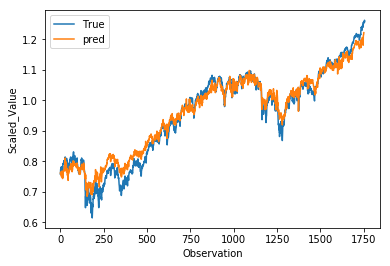

dict_keys(['loss', 'val_loss'])


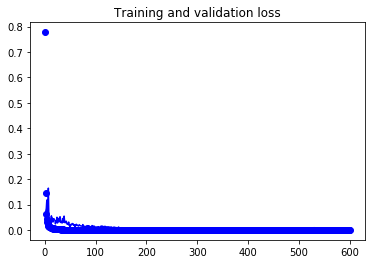

In [67]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)
save_train_csv(file_name=file_name)

# custom r2 score

In [68]:
for iter_number in range(9,10):
    iter_number = str(iter_number)
    file_name='NYA_de5_clf5_pe1_tcn'+iter_number
    print(file_name+":")
    custom_r2_score(file_name)

NYA_de5_clf5_pe1_tcn9:
(1756,)
The Adjusted R2 score on the Test set is:	0.957
The Custom  sign score on the Test set is:	0.497
The Custom  R2 score on the Test set is:	0.727


In [69]:
#tcn9
file_name='NYA_de5_clf5_pe10_tcn9'
penalty=10

In [70]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=512, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_8(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_19[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_36 (Activation)      (None, 1, 512)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 10/600
6808/6808==============================] - 6s 836us/sample - loss: 0.0406 - val_loss: 0.1020
Epoch 11/600
6808/6808==============================] - 6s 832us/sample - loss: 0.0376 - val_loss: 0.0706
Epoch 12/600
6808/6808==============================] - 6s 836us/sample - loss: 0.0342 - val_loss: 0.2197
Epoch 13/600
6808/6808==============================] - 6s 840us/sample - loss: 0.0261 - val_loss: 0.0260
Epoch 14/600
6808/6808==============================] - 6s 838us/sample - loss: 0.0242 - val_loss: 0.1201
Epoch 15/600
6808/6808==============================] - 6s 836us/sample - loss: 0.0237 - val_loss: 0.2057
Epoch 16/600
6808/6808==============================] - 6s 836us/sample - loss: 0.0241 - val_loss: 0.0201
Epoch 17/600
6808/6808==============================] - 6s 842us/sample - loss: 0.0160 - val_loss: 0.0419
Epoch 18/600
6808/6808==============================] - 6s 838us/sample - loss: 0.0191 - val_loss: 0.1235
Epoch 19/600
6808/6808========================

Epoch 163/600
6808/6808==============================] - 6s 839us/sample - loss: 9.0385e-04 - val_loss: 0.0101
Epoch 164/600
6808/6808==============================] - 6s 841us/sample - loss: 9.1136e-04 - val_loss: 0.0123
Epoch 165/600
6808/6808==============================] - 6s 837us/sample - loss: 8.7675e-04 - val_loss: 0.0087
Epoch 166/600
6808/6808==============================] - 6s 839us/sample - loss: 8.7817e-04 - val_loss: 0.0076
Epoch 167/600
6808/6808==============================] - 6s 835us/sample - loss: 8.4877e-04 - val_loss: 0.0093
Epoch 168/600
6808/6808==============================] - 6s 841us/sample - loss: 9.2927e-04 - val_loss: 0.0095
Epoch 169/600
6808/6808==============================] - 6s 839us/sample - loss: 8.7348e-04 - val_loss: 0.0077
Epoch 170/600
6808/6808==============================] - 6s 842us/sample - loss: 8.2765e-04 - val_loss: 0.0080
Epoch 171/600
6808/6808==============================] - 6s 834us/sample - loss: 8.0612e-04 - val_loss: 0.0064
E

Epoch 237/600
6808/6808==============================] - 6s 840us/sample - loss: 8.3736e-04 - val_loss: 0.0072
Epoch 238/600
6808/6808==============================] - 6s 834us/sample - loss: 7.3238e-04 - val_loss: 0.0074
Epoch 239/600
6808/6808==============================] - 6s 838us/sample - loss: 7.4218e-04 - val_loss: 0.0078
Epoch 240/600
6808/6808==============================] - 6s 840us/sample - loss: 7.3165e-04 - val_loss: 0.0094
Epoch 241/600
6808/6808==============================] - 6s 840us/sample - loss: 8.1269e-04 - val_loss: 0.0091
Epoch 242/600
6808/6808==============================] - 6s 837us/sample - loss: 7.2075e-04 - val_loss: 0.0082
Epoch 243/600
6808/6808==============================] - 6s 838us/sample - loss: 7.5716e-04 - val_loss: 0.0071
Epoch 244/600
6808/6808==============================] - 6s 844us/sample - loss: 7.0691e-04 - val_loss: 0.0072
Epoch 245/600
6808/6808==============================] - 6s 833us/sample - loss: 7.0738e-04 - val_loss: 0.0071
E

Epoch 311/600
6808/6808==============================] - 6s 841us/sample - loss: 6.5005e-04 - val_loss: 0.0066
Epoch 312/600
6808/6808==============================] - 6s 843us/sample - loss: 7.0640e-04 - val_loss: 0.0088
Epoch 313/600
6808/6808==============================] - 6s 840us/sample - loss: 6.9245e-04 - val_loss: 0.0095
Epoch 314/600
6808/6808==============================] - 6s 840us/sample - loss: 7.3161e-04 - val_loss: 0.0088
Epoch 315/600
6808/6808==============================] - 6s 835us/sample - loss: 7.2990e-04 - val_loss: 0.0071
Epoch 316/600
6808/6808==============================] - 6s 840us/sample - loss: 6.7750e-04 - val_loss: 0.0092
Epoch 317/600
6808/6808==============================] - 6s 837us/sample - loss: 6.8240e-04 - val_loss: 0.0064
Epoch 318/600
6808/6808==============================] - 6s 843us/sample - loss: 6.9625e-04 - val_loss: 0.0084
Epoch 319/600
6808/6808==============================] - 6s 841us/sample - loss: 6.7411e-04 - val_loss: 0.0082
E

Epoch 385/600
6808/6808==============================] - 6s 838us/sample - loss: 6.6040e-04 - val_loss: 0.0114
Epoch 386/600
6808/6808==============================] - 6s 845us/sample - loss: 6.8435e-04 - val_loss: 0.0152
Epoch 387/600
6808/6808==============================] - 6s 837us/sample - loss: 6.5697e-04 - val_loss: 0.0146
Epoch 388/600
6808/6808==============================] - 6s 841us/sample - loss: 6.7743e-04 - val_loss: 0.0142
Epoch 389/600
6808/6808==============================] - 6s 839us/sample - loss: 6.7490e-04 - val_loss: 0.0155
Epoch 390/600
6808/6808==============================] - 6s 836us/sample - loss: 6.8629e-04 - val_loss: 0.0149
Epoch 391/600
6808/6808==============================] - 6s 838us/sample - loss: 6.8916e-04 - val_loss: 0.0158
Epoch 392/600
6808/6808==============================] - 6s 839us/sample - loss: 6.4250e-04 - val_loss: 0.0130
Epoch 393/600
6808/6808==============================] - 6s 844us/sample - loss: 6.7819e-04 - val_loss: 0.0120
E

Epoch 459/600
6808/6808==============================] - 6s 839us/sample - loss: 6.2984e-04 - val_loss: 0.0130
Epoch 460/600
6808/6808==============================] - 6s 840us/sample - loss: 6.4461e-04 - val_loss: 0.0112
Epoch 461/600
6808/6808==============================] - 6s 834us/sample - loss: 6.2641e-04 - val_loss: 0.0128
Epoch 462/600
6808/6808==============================] - 6s 836us/sample - loss: 6.5052e-04 - val_loss: 0.0142
Epoch 463/600
6808/6808==============================] - 6s 840us/sample - loss: 6.6269e-04 - val_loss: 0.0120
Epoch 464/600
6808/6808==============================] - 6s 838us/sample - loss: 6.6559e-04 - val_loss: 0.0123
Epoch 465/600
6808/6808==============================] - 6s 838us/sample - loss: 6.3648e-04 - val_loss: 0.0129
Epoch 466/600
6808/6808==============================] - 6s 835us/sample - loss: 6.5266e-04 - val_loss: 0.0105
Epoch 467/600
6808/6808==============================] - 6s 842us/sample - loss: 6.6274e-04 - val_loss: 0.0127
E

Epoch 533/600
6808/6808==============================] - 6s 838us/sample - loss: 6.1715e-04 - val_loss: 0.0120
Epoch 534/600
6808/6808==============================] - 6s 840us/sample - loss: 6.2549e-04 - val_loss: 0.0117
Epoch 535/600
6808/6808==============================] - 6s 843us/sample - loss: 6.2161e-04 - val_loss: 0.0116
Epoch 536/600
6808/6808==============================] - 6s 844us/sample - loss: 6.3788e-04 - val_loss: 0.0090
Epoch 537/600
6808/6808==============================] - 6s 840us/sample - loss: 6.2066e-04 - val_loss: 0.0148
Epoch 538/600
6808/6808==============================] - 6s 840us/sample - loss: 6.2561e-04 - val_loss: 0.0127
Epoch 539/600
6808/6808==============================] - 6s 835us/sample - loss: 6.1627e-04 - val_loss: 0.0129
Epoch 540/600
6808/6808==============================] - 6s 840us/sample - loss: 6.1915e-04 - val_loss: 0.0138
Epoch 541/600
6808/6808==============================] - 6s 844us/sample - loss: 6.1616e-04 - val_loss: 0.0141
E

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.940339
The Adjusted R2 score on the Test set is:	0.939


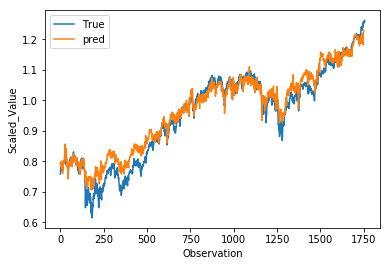

dict_keys(['loss', 'val_loss'])


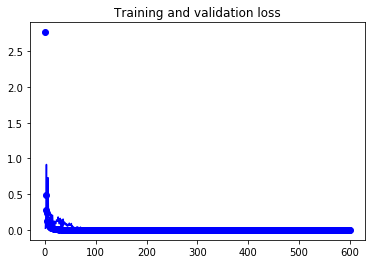

In [71]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)
save_train_csv(file_name=file_name)

# custom r2 score

In [72]:
for iter_number in range(9,10):
    iter_number = str(iter_number)
    file_name='NYA_de5_clf5_pe10_tcn'+iter_number
    print(file_name+":")
    custom_r2_score(file_name)

NYA_de5_clf5_pe10_tcn9:
(1756,)
The Adjusted R2 score on the Test set is:	0.939
The Custom  sign score on the Test set is:	0.499
The Custom  R2 score on the Test set is:	0.719


In [73]:
#tcn9
file_name='NYA_de5_clf5_pe100_tcn9'
penalty=100

In [74]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=512, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_8(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_22[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_42 (Activation)      (None, 1, 512)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 10/600
6808/6808==============================] - 6s 825us/sample - loss: 0.3886 - val_loss: 1.4028
Epoch 11/600
6808/6808==============================] - 6s 832us/sample - loss: 0.4316 - val_loss: 3.7684
Epoch 12/600
6808/6808==============================] - 6s 824us/sample - loss: 0.3260 - val_loss: 3.8455
Epoch 13/600
6808/6808==============================] - 6s 839us/sample - loss: 0.3130 - val_loss: 3.9077
Epoch 14/600
6808/6808==============================] - 6s 830us/sample - loss: 0.2478 - val_loss: 2.6139
Epoch 15/600
6808/6808==============================] - 6s 836us/sample - loss: 0.2412 - val_loss: 1.8293
Epoch 16/600
6808/6808==============================] - 6s 829us/sample - loss: 0.1897 - val_loss: 0.7865
Epoch 17/600
6808/6808==============================] - 6s 833us/sample - loss: 0.2088 - val_loss: 1.4028
Epoch 18/600
6808/6808==============================] - 6s 829us/sample - loss: 0.1551 - val_loss: 0.8334
Epoch 19/600
6808/6808========================

6808/6808==============================] - 6s 824us/sample - loss: 0.0091 - val_loss: 0.0790
Epoch 164/600
6808/6808==============================] - 6s 824us/sample - loss: 0.0092 - val_loss: 0.0919
Epoch 165/600
6808/6808==============================] - 6s 822us/sample - loss: 0.0083 - val_loss: 0.0793
Epoch 166/600
6808/6808==============================] - 6s 823us/sample - loss: 0.0084 - val_loss: 0.1008
Epoch 167/600
6808/6808==============================] - 6s 826us/sample - loss: 0.0084 - val_loss: 0.0939
Epoch 168/600
6808/6808==============================] - 6s 822us/sample - loss: 0.0097 - val_loss: 0.1073
Epoch 169/600
6808/6808==============================] - 6s 825us/sample - loss: 0.0103 - val_loss: 0.1157
Epoch 170/600
6808/6808==============================] - 6s 825us/sample - loss: 0.0094 - val_loss: 0.0869
Epoch 171/600
6808/6808==============================] - 6s 824us/sample - loss: 0.0095 - val_loss: 0.0936
Epoch 172/600
6808/6808============================

6808/6808==============================] - 6s 822us/sample - loss: 0.0113 - val_loss: 0.1225
Epoch 316/600
6808/6808==============================] - 6s 823us/sample - loss: 0.0101 - val_loss: 0.1312
Epoch 317/600
6808/6808==============================] - 6s 832us/sample - loss: 0.0092 - val_loss: 0.1304
Epoch 318/600
6808/6808==============================] - 6s 821us/sample - loss: 0.0097 - val_loss: 0.1443
Epoch 319/600
6808/6808==============================] - 6s 827us/sample - loss: 0.0102 - val_loss: 0.1700
Epoch 320/600
6808/6808==============================] - 6s 825us/sample - loss: 0.0102 - val_loss: 0.1553
Epoch 321/600
6808/6808==============================] - 6s 825us/sample - loss: 0.0112 - val_loss: 0.1669
Epoch 322/600
6808/6808==============================] - 6s 823us/sample - loss: 0.0107 - val_loss: 0.1789
Epoch 323/600
6808/6808==============================] - 6s 823us/sample - loss: 0.0101 - val_loss: 0.1676
Epoch 324/600
6808/6808============================

6808/6808==============================] - 6s 827us/sample - loss: 0.0087 - val_loss: 0.0921
Epoch 468/600
6808/6808==============================] - 6s 819us/sample - loss: 0.0101 - val_loss: 0.1244
Epoch 469/600
6808/6808==============================] - 6s 823us/sample - loss: 0.0093 - val_loss: 0.1036
Epoch 470/600
6808/6808==============================] - 6s 823us/sample - loss: 0.0085 - val_loss: 0.1393
Epoch 471/600
6808/6808==============================] - 6s 821us/sample - loss: 0.0112 - val_loss: 0.1843
Epoch 472/600
6808/6808==============================] - 6s 814us/sample - loss: 0.0093 - val_loss: 0.1134
Epoch 473/600
6808/6808==============================] - 6s 819us/sample - loss: 0.0107 - val_loss: 0.1361
Epoch 474/600
6808/6808==============================] - 6s 820us/sample - loss: 0.0086 - val_loss: 0.1189
Epoch 475/600
6808/6808==============================] - 6s 817us/sample - loss: 0.0092 - val_loss: 0.1320
Epoch 476/600
6808/6808============================

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: -0.104482
The Adjusted R2 score on the Test set is:	-0.136


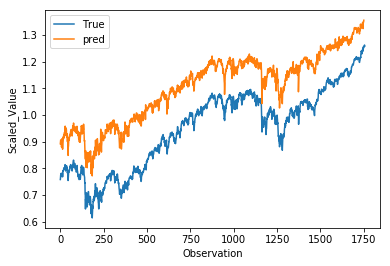

dict_keys(['loss', 'val_loss'])


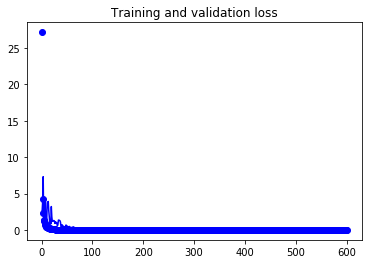

In [75]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)
save_train_csv(file_name=file_name)

# custom r2 score

In [76]:
for iter_number in range(9,10):
    iter_number = str(iter_number)
    file_name='NYA_de5_clf5_pe100_tcn'+iter_number
    print(file_name+":")
    custom_r2_score(file_name)

NYA_de5_clf5_pe100_tcn9:
(1756,)
The Adjusted R2 score on the Test set is:	-0.136
The Custom  sign score on the Test set is:	0.496
The Custom  R2 score on the Test set is:	0.180
